<a href="https://colab.research.google.com/github/MarcoRCB21/astroAI/blob/main/Astro_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de imputación de valores faltantes

### Marco Corrales-Barrantes

##Fundamentos

En esta primera sección, se importan las librerías y los paquetes necesarios para el correcto funcionamiento del código desarrollado.

In [ ]:
#Librerías generales para realizar los cálculos matemáticos y los gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Paquetes necesarios para realizar los métodos para imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error

In [ ]:
stellar = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/MarcoRCB21/astroAI/main/stellar.csv"))

Funciones necesarias previo al tratamiento de los datasets:

In [ ]:
def countNaN_DF(df): # Conteo del total y de la proporción de NaN por columna
  numberOfNaN = pd.DataFrame()
  numberOfNaN[0] = df.isna().sum()
  numberOfNaN[1] = round((df.isna().sum())/len(df),5) 
  numberOfNaN = numberOfNaN.T
  return numberOfNaN

def filterMSClass(df):
  df = df[df['clase'] == 'MS']
  print(df)
  df = df.reset_index(drop=True)
  print(df)
  return df

def filterColumns(df):
    columnsToKeep = ['M', 'R', 'Teff', 'L', 'Meta', 'logg', 'rho']
    return df.loc[:, columnsToKeep]

def columnsWithNaN(df):
    listOfCol = []
    for x in df:
        if df[x].isna().sum() > 0:
            listOfCol.append(x)
    return listOfCol

def encode_string_columns(df):
    label_encoders = {}
    df_encoded = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df_encoded, label_encoders

def decode_string_columns(df, label_encoders):
    df_decoded = df.copy()
    for col, le in label_encoders.items():
        df_decoded[col] = le.inverse_transform(df_decoded[col].round().astype(int))
    return df_decoded

In [ ]:
stellar = filterMSClass(stellar)
stellar = filterColumns(stellar)
stellar.replace(float(0), np.nan)
countNaN = countNaN_DF(stellar)
countNaN.to_csv('countNaN.csv')
stellar.to_csv('stellar.csv')
stellarFiltered = stellar.copy()

     Seq     SIMBAD_ID      M    eM1    eM2       R     eR1     eR2   Teff  \
0      1  47_Tuc-V69 A  0.876  0.005  0.005  1.3160  0.0050  0.0050   5945   
1      2  47_Tuc-V69 B  0.859  0.006  0.006  1.1630  0.0060  0.0060   5959   
2      3      AD_Boo A  1.414  0.009  0.009  1.6140  0.0140  0.0140   6575   
3      4      AD_Boo B  1.209  0.006  0.006  1.2180  0.0100  0.0100   6145   
4      5      AG_Ari A  2.164  0.070  0.070  2.2320  0.0230  0.0230  10300   
..   ...           ...    ...    ...    ...     ...     ...     ...    ...   
928  929      HD209369  1.531  0.061  0.061  2.4500  0.0720  0.0720   6755   
929  930      HD217014  1.120  0.063  0.063  1.0900  0.0240  0.0240   5978   
931  932        HD3651  0.848  0.040  0.040  0.8584  0.0088  0.0088   5270   
932  933       HD75732  0.874  0.013  0.013  0.9600  0.0180  0.0180   5165   
933  934        HD9826  1.312  0.075  0.075  1.6840  0.0400  0.0400   6243   

     eTeff1  ...    cutoff  clase  type  pla  catalog       e_M

##Métodos sencillos o univariable: Media, Mediana y Linear Interpolation:

###Funciones para Media, Mediana, Moda desarrolladas con SimpleImputer():

In [ ]:
def replaceSimpleImputer_Mean(df):
  # Instantiate the SimpleImputer with the mean strategy
  imputer = SimpleImputer(strategy='mean')

  # Handle string columns by encoding them
  df_encoded, label_encoders = encode_string_columns(df)

  imputed_data = imputer.fit_transform(df_encoded)
  imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

  # Reverse the encoding for string columns
  imputed_df = decode_string_columns(imputed_df, label_encoders)

  return imputed_df

def replaceSimpleImputer_Median(df):
  # Instantiate the SimpleImputer with the mean strategy
  imputer = SimpleImputer(strategy='median')

  # Handle string columns by encoding them
  df_encoded, label_encoders = encode_string_columns(df)

  imputed_data = imputer.fit_transform(df_encoded)
  imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

  # Reverse the encoding for string columns
  imputed_df = decode_string_columns(imputed_df, label_encoders)

  return imputed_df
"""
def replaceSimpleImputer_Mode(df):
  # Instantiate the SimpleImputer with the mean strategy
  imputer = SimpleImputer(strategy='most_frequent')

  # Handle string columns by encoding them
  df_encoded, label_encoders = encode_string_columns(df)

  imputed_data = imputer.fit_transform(df_encoded)
  imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

  # Reverse the encoding for string columns
  imputed_df = decode_string_columns(imputed_df, label_encoders)

  return imputed_df
"""

"\ndef replaceSimpleImputer_Mode(df):\n  # Instantiate the SimpleImputer with the mean strategy\n  imputer = SimpleImputer(strategy='most_frequent')\n\n  # Handle string columns by encoding them\n  df_encoded, label_encoders = encode_string_columns(df)\n\n  imputed_data = imputer.fit_transform(df_encoded)\n  imputed_df = pd.DataFrame(imputed_data, columns=df.columns)\n\n  # Reverse the encoding for string columns\n  imputed_df = decode_string_columns(imputed_df, label_encoders)\n\n  return imputed_df\n"

In [ ]:
dataSetMean = stellarFiltered.copy() 
dataSetMean = replaceSimpleImputer_Mean(dataSetMean)
dataSetMean.to_csv("dataSetMean.csv")

dataSetMedian = stellarFiltered.copy() 
dataSetMedian = replaceSimpleImputer_Median(dataSetMedian)
dataSetMedian.to_csv("dataSetMedian.csv")
"""
dataSetSI_Mode = stellarFiltered.copy()
dataSetSI_Mode = replaceSimpleImputer_Mode(dataSetSI_Mode)
dataSetSI_Mode.to_csv("dataSetSI_Mode.csv")
"""

'\ndataSetSI_Mode = stellarFiltered.copy()\ndataSetSI_Mode = replaceSimpleImputer_Mode(dataSetSI_Mode)\ndataSetSI_Mode.to_csv("dataSetSI_Mode.csv")\n'

###Función para Interpolación lineal:

In [ ]:
"""
def replaceWithLI(df):
  df = df.interpolate(method='linear')
  return df
"""

"\ndef replaceWithLI(df):\n  df = df.interpolate(method='linear')\n  return df\n"

In [ ]:
"""
dataSetLI = stellarFiltered.copy()
dataSetLI = replaceWithLI(dataSetLI)
dataSetLI.to_csv("dataSetLI.csv")
"""

'\ndataSetLI = stellarFiltered.copy()\ndataSetLI = replaceWithLI(dataSetLI)\ndataSetLI.to_csv("dataSetLI.csv")\n'

##Métodos complejos o multivariable: kNN, MICE (Naive-Bayes, Linear Regression, Random Forest, SVM, kNN):

###Experimento 1: Solo masa

In [ ]:
def replaceWithPR_Exp1(df):
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]

      degree = 2

      pr = make_pipeline(PolynomialFeatures(degree), LinearRegression())
      iterative_imputer = IterativeImputer(estimator=pr)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)
    
      # Impute missing values using the fit_transform method
      imputed_data = iterative_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df


def replaceWithNB_Exp1(df): #Naive-Bayes
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]

      nb = GaussianNB()
      iterative_imputer = IterativeImputer(estimator=nb)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)
    
      # Impute missing values using the fit_transform method
      imputed_data = iterative_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df

def replaceWithLR_Exp1(df): # Linear Regression
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]

      lr = LinearRegression()
      iterative_imputer = IterativeImputer(estimator=lr)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)
    
      # Impute missing values using the fit_transform method
      imputed_data = iterative_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df

def replaceWithRF_Exp1(df): # Random Forest
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]
    
      RF = RandomForestRegressor()
      iterative_imputer = IterativeImputer(estimator=RF)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)
    
      # Impute missing values using the fit_transform method
      imputed_data = iterative_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df

def replaceWithSVM_Exp1(df): # Support Vector Machine
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]

      SVRest = SVR()
      iterative_imputer = IterativeImputer(estimator=SVRest)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)
    
      # Impute missing values using the fit_transform method
      imputed_data = iterative_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df

def replaceWithkNN_Exp1(df): # k-Nearest Neighbors
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]

      kNN = KNeighborsRegressor(n_neighbors=15)
      iterative_imputer = IterativeImputer(estimator=kNN)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)
    
      # Impute missing values using the fit_transform method
      imputed_data = iterative_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df

def replaceWithkNN2_Exp1(df):
    mass = df.loc[:,'M']
    features = df.loc[:,columnsWithNaN(df)]

    for x in features:
      newDF = pd.DataFrame()
      newDF['M'] = mass
      newDF[x] = features.loc[:,x]

      knn_imputer = KNNImputer(n_neighbors=5)
    
      # Handle string columns by encoding them
      df_encoded, label_encoders = encode_string_columns(newDF)

      # Impute missing values using the fit_transform method
      imputed_data = knn_imputer.fit_transform(df_encoded)
      imputed_df = pd.DataFrame(imputed_data, columns=newDF.columns)

      # Reverse the encoding for string columns
      imputed_df = decode_string_columns(imputed_df, label_encoders)

      df[x] = imputed_df[x]

    return df

In [ ]:
#dataSetNB_Exp1 = stellarFiltered.copy()
#dataSetNB_Exp1 = replaceWithNB_Exp1(dataSetNB_Exp1)
#dataSetNB_Exp1.to_csv("dataSetNB_Exp1.csv")

#dataSetPR_Exp1 = stellarFiltered.copy()
#dataSetPR_Exp1 = replaceWithPR_Exp1(dataSetPR_Exp1)
#dataSetPR_Exp1.to_csv("dataSetPR_Exp1.csv")

dataSetLR_Exp1 = stellarFiltered.copy()
dataSetLR_Exp1 = replaceWithLR_Exp1(dataSetLR_Exp1)
dataSetLR_Exp1.to_csv("dataSetLR_Exp1.csv")

dataSetRF_Exp1 = stellarFiltered.copy()
dataSetRF_Exp1 = replaceWithRF_Exp1(dataSetRF_Exp1)
dataSetRF_Exp1.to_csv("dataSetRF_Exp1.csv")

dataSetSVM_Exp1 = stellarFiltered.copy()
dataSetSVM_Exp1 = replaceWithSVM_Exp1(dataSetSVM_Exp1)
dataSetSVM_Exp1.to_csv("dataSetSVM_Exp1.csv")

dataSetkNN_Exp1 = stellarFiltered.copy()
dataSetkNN_Exp1 = replaceWithkNN_Exp1(dataSetkNN_Exp1)
dataSetkNN_Exp1.to_csv("dataSetkNN_Exp1.csv")

dataSetkNN2_Exp1 = stellarFiltered.copy()
dataSetkNN2_Exp1 = replaceWithkNN2_Exp1(dataSetkNN2_Exp1)
dataSetkNN2_Exp1.to_csv("dataSetkNN2_Exp1.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Otros estimadores o modelos que se podrían utilizar con la función IterativeImputer (es decir, en el método MICE) son:
* Ridge Regression (sklearn.linear_model.Ridge)
* Lasso Regression (sklearn.linear_model.Lasso)
* Elastic Net (sklearn.linear_model.ElasticNet)
* Decision Trees (sklearn.tree.DecisionTreeRegressor)
* Gradient Boosting (sklearn.ensemble.GradientBoostingRegressor)

###Experimento 2: Muchos con masa

In [ ]:
def replaceWithPR_Exp2(df):
    degree = 2
    pr = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    iterative_imputer = IterativeImputer(estimator=pr)

    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

def replaceWithNB_Exp2(df): # Naive-Bayes
    nb = GaussianNB()
    iterative_imputer = IterativeImputer(estimator=nb)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

def replaceWithLR_Exp2(df): # Linear Regression
    lr = LinearRegression()
    iterative_imputer = IterativeImputer(estimator=lr)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

    return df

def replaceWithRF_Exp2(df): # Random Forest
    RF = RandomForestRegressor()
    iterative_imputer = IterativeImputer(estimator=RF)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

def replaceWithSVM_Exp2(df): # Support Vector Machine
    SVRest = SVR()
    iterative_imputer = IterativeImputer(estimator=SVRest)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

def replaceWithkNN_Exp2(df): # k-Nearest Neighbors
    kNN = KNeighborsRegressor(n_neighbors=15)
    iterative_imputer = IterativeImputer(estimator=kNN)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

def replaceWithkNN2_Exp2(df):
    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)

    # Impute missing values using the fit_transform method
    imputed_data = knn_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

In [ ]:
#dataSetNB_Exp2 = stellarFiltered.copy()
#dataSetNB_Exp2 = replaceWithNB_Exp2(dataSetNB_Exp2)
#dataSetNB_Exp2.to_csv("dataSetNB_Exp2.csv")

#dataSetPR_Exp2 = stellarFiltered.copy()
#dataSetPR_Exp2 = replaceWithPR_Exp2(dataSetPR_Exp2)
#dataSetPR_Exp2.to_csv("dataSetPR_Exp2.csv")

dataSetLR_Exp2 = stellarFiltered.copy()
dataSetLR_Exp2 = replaceWithLR_Exp2(dataSetLR_Exp2)
dataSetLR_Exp2.to_csv("dataSetLR_Exp2.csv")

dataSetRF_Exp2 = stellarFiltered.copy()
dataSetRF_Exp2 = replaceWithRF_Exp2(dataSetRF_Exp2)
dataSetRF_Exp2.to_csv("dataSetRF_Exp2.csv")

dataSetSVM_Exp2 = stellarFiltered.copy()
dataSetSVM_Exp2 = replaceWithSVM_Exp2(dataSetSVM_Exp2)
dataSetSVM_Exp2.to_csv("dataSetSVM_Exp2.csv")

dataSetkNN_Exp2 = stellarFiltered.copy()
dataSetkNN_Exp2 = replaceWithkNN_Exp2(dataSetkNN_Exp2)
dataSetkNN_Exp2.to_csv("dataSetkNN_Exp2.csv")

dataSetkNN2_Exp2 = stellarFiltered.copy()
dataSetkNN2_Exp2 = replaceWithkNN2_Exp2(dataSetkNN2_Exp2)
dataSetkNN2_Exp2.to_csv("dataSetkNN2_Exp2.csv")

###Experimento 3: Con muchas sin masa

In [ ]:
def replaceWithPR_Exp3(df):
    df = df.drop('M', axis=1)

    degree = 2
    pr = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    iterative_imputer = IterativeImputer(estimator=pr)

    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    return imputed_df

def replaceWithNB_Exp3(df): # Naive-Bayes
    M = df.loc[:,'M']

    df = df.drop('M', axis=1)

    nb = GaussianNB()
    iterative_imputer = IterativeImputer(estimator=nb)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    df.insert(loc=0, column='M', value=M)

    return imputed_df

def replaceWithLR_Exp3(df): # Linear Regression
    M = df.loc[:,'M']

    df = df.drop('M', axis=1)

    lr = LinearRegression()
    iterative_imputer = IterativeImputer(estimator=lr)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    df.insert(loc=0, column='M', value=M)

    return imputed_df

def replaceWithRF_Exp3(df): # Random Forest
    M = df.loc[:,'M']

    df = df.drop('M', axis=1)

    RF = RandomForestRegressor()
    iterative_imputer = IterativeImputer(estimator=RF)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    df.insert(loc=0, column='M', value=M)

    return imputed_df

def replaceWithSVM_Exp3(df): # Support Vector Machine
    M = df.loc[:,'M']

    df = df.drop('M', axis=1)

    SVRest = SVR()
    iterative_imputer = IterativeImputer(estimator=SVRest)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    df.insert(loc=0, column='M', value=M)

    return imputed_df

def replaceWithkNN_Exp3(df): # k-Nearest Neighbors
    M = df.loc[:,'M']

    df = df.drop('M', axis=1)

    kNN = KNeighborsRegressor(n_neighbors=15)
    iterative_imputer = IterativeImputer(estimator=kNN)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)
    
    # Impute missing values using the fit_transform method
    imputed_data = iterative_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    df.insert(loc=0, column='M', value=M)

    return imputed_df

def replaceWithkNN2_Exp3(df):
    M = df.loc[:,'M']

    df = df.drop('M', axis=1)

    knn_imputer = KNNImputer(n_neighbors=5)
    
    # Handle string columns by encoding them
    df_encoded, label_encoders = encode_string_columns(df)

    # Impute missing values using the fit_transform method
    imputed_data = knn_imputer.fit_transform(df_encoded)
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

    # Reverse the encoding for string columns
    imputed_df = decode_string_columns(imputed_df, label_encoders)

    df.insert(loc=0, column='M', value=M)

    return imputed_df

In [ ]:
#dataSetNB_Exp3 = stellarFiltered.copy()
#dataSetNB_Exp3 = replaceWithNB_Exp3(dataSetNB_Exp3)
#dataSetNB_Exp3.to_csv("dataSetNB_Exp3.csv")

#dataSetPR_Exp3 = stellarFiltered.copy()
#dataSetPR_Exp3 = replaceWithPR_Exp3(dataSetPR_Exp3)
#dataSetPR_Exp3.to_csv("dataSetPR_Exp3.csv")

dataSetLR_Exp3 = stellarFiltered.copy()
dataSetLR_Exp3 = replaceWithLR_Exp3(dataSetLR_Exp3)
dataSetLR_Exp3.to_csv("dataSetLR_Exp3.csv")

dataSetRF_Exp3 = stellarFiltered.copy()
dataSetRF_Exp3 = replaceWithRF_Exp3(dataSetRF_Exp3)
dataSetRF_Exp3.to_csv("dataSetRF_Exp3.csv")

dataSetSVM_Exp3 = stellarFiltered.copy()
dataSetSVM_Exp3 = replaceWithSVM_Exp3(dataSetSVM_Exp3)
dataSetSVM_Exp3.to_csv("dataSetSVM_Exp3.csv")

dataSetkNN_Exp3 = stellarFiltered.copy()
dataSetkNN_Exp3 = replaceWithkNN_Exp3(dataSetkNN_Exp3)
dataSetkNN_Exp3.to_csv("dataSetkNN_Exp3.csv")

dataSetkNN2_Exp3 = stellarFiltered.copy()
dataSetkNN2_Exp3 = replaceWithkNN2_Exp3(dataSetkNN2_Exp3)
dataSetkNN2_Exp3.to_csv("dataSetkNN2_Exp3.csv")

##MAE y RMSE

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create a sample dataframe
trueMatrix = dataSetMICE_BR.drop(['SIMBAD_ID','clase','type','catalog','mode'], axis=1) # Usado por tener la mayor precisión
testMatrix = trueMatrix.copy()

# Define the fraction of values to remove
fraction_to_remove = 0.2
total_values = testMatrix.size
values_to_remove = int(total_values * fraction_to_remove)

# Generate random row and column indices
row_indices = np.random.randint(1, testMatrix.shape[0], values_to_remove)
col_indices = np.random.randint(1, testMatrix.shape[1], values_to_remove)

# Set the corresponding values to NaN
for row, col in zip(row_indices, col_indices):
    testMatrix.iloc[row, col] = np.nan

In [ ]:
print("Error MAE con replaceSimpleImputer_Mean: ", mean_absolute_error(trueMatrix,replaceSimpleImputer_Mean(testMatrix.copy())))
print("Error MAE con replaceSimpleImputer_Median: ", mean_absolute_error(trueMatrix,replaceSimpleImputer_Median(testMatrix.copy())))
print("Error MAE con replaceSimpleImputer_Mode: ", mean_absolute_error(trueMatrix,replaceSimpleImputer_Mode(testMatrix.copy())))
print("Error MAE con replaceWithLI: ", mean_absolute_error(trueMatrix,replaceWithLI(testMatrix.copy())))
print("Error MAE con replaceWithMICE_BR: ", mean_absolute_error(trueMatrix,replaceWithMICE_BR(testMatrix.copy())))
print("Error MAE con replaceWithMICE_LR: ", mean_absolute_error(trueMatrix,replaceWithMICE_LR(testMatrix.copy())))
print("Error MAE con replaceWithMICE_RF: ", mean_absolute_error(trueMatrix,replaceWithMICE_RF(testMatrix.copy())))
print("Error MAE con replaceWithMICE_SVM: ", mean_absolute_error(trueMatrix,replaceWithMICE_SVM(testMatrix.copy())))
print("Error MAE con replaceWithMICE_kNN: ", mean_absolute_error(trueMatrix,replaceWithMICE_kNN(testMatrix.copy())))
print("Error MAE con replaceWithkNN: ", mean_absolute_error(trueMatrix,replaceWithkNN(testMatrix.copy())))

In [ ]:
print("Error RMSE con replaceSimpleImputer_Mean: ", mean_squared_error(trueMatrix,replaceSimpleImputer_Mean(testMatrix.copy()),squared=False))
print("Error RMSE con replaceSimpleImputer_Median: ", mean_squared_error(trueMatrix,replaceSimpleImputer_Median(testMatrix.copy()),squared=False))
print("Error RMSE con replaceSimpleImputer_Mode: ", mean_squared_error(trueMatrix,replaceSimpleImputer_Mode(testMatrix.copy()),squared=False))
print("Error RMSE con replaceWithLI: ", mean_squared_error(trueMatrix,replaceWithLI(testMatrix.copy()),squared=False))
print("Error RMSE con replaceWithMICE_BR: ", mean_squared_error(trueMatrix,replaceWithMICE_BR(testMatrix.copy()),squared=False))
print("Error RMSE con replaceWithMICE_LR: ", mean_squared_error(trueMatrix,replaceWithMICE_LR(testMatrix.copy()),squared=False))
print("Error MAE con replaceWithMICE_RF: ", mean_squared_error(trueMatrix,replaceWithMICE_RF(testMatrix.copy()),squared=False))
print("Error MAE con replaceWithMICE_SVM: ", mean_squared_error(trueMatrix,replaceWithMICE_SVM(testMatrix.copy()),squared=False))
print("Error MAE con replaceWithMICE_kNN: ", mean_squared_error(trueMatrix,replaceWithMICE_kNN(testMatrix.copy()),squared=False))
print("Error MAE con replaceWithkNN: ", mean_squared_error(trueMatrix,replaceWithkNN(testMatrix.copy()),squared=False))

##Validación gráfica

In [ ]:
dataframes_Exp1 = {
    "Linear Regression":dataSetLR_Exp1,
    #"Polinomial Regression":dataSetPR_Exp1,
    "Random Forest":dataSetRF_Exp1,
    "SVM":dataSetSVM_Exp1,
    "Mean":dataSetMean,
    "Median":dataSetMedian,
    "kNN with Iterative Imputer": dataSetkNN_Exp1,
    "kNN":dataSetkNN2_Exp1}

dataframes_Exp2 = {
    "Linear Regression":dataSetLR_Exp2,
    #"Polinomial Regression":dataSetPR_Exp2,
    "Random Forest":dataSetRF_Exp2,
    "SVM":dataSetSVM_Exp2,
    "Mean":dataSetMean,
    "Median":dataSetMedian,
    "kNN with Iterative Imputer": dataSetkNN_Exp2,
    "kNN":dataSetkNN2_Exp2}

dataframes_Exp3 = {
    "Linear Regression":dataSetLR_Exp3,
    #"Polinomial Regression":dataSetPR_Exp3,
    "Random Forest":dataSetRF_Exp3,
    "SVM":dataSetSVM_Exp3,
    "Mean":dataSetMean,
    "Median":dataSetMedian,
    "kNN with Iterative Imputer": dataSetkNN_Exp3,
    "kNN":dataSetkNN2_Exp3}

listDataframes = [dataframes_Exp1,dataframes_Exp2,dataframes_Exp3]

In [ ]:
def graficoPorMetodo(listDataframes, originalData):
    colConNaN = []
    for x in originalData:
      if originalData[x].isna().sum() > 0:
        colConNaN.append(x)
    
    for w in listDataframes[0].keys():
        num_columns = len(colConNaN)
        plot_width_per_column = 6  # Modify this value to adjust the width of the individual plots
        fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(plot_width_per_column * num_columns, 5))
        fig.suptitle(w)

        for idx, y in enumerate(colConNaN):
            for a, z in enumerate(listDataframes, start=1):
                imputedData = z[w]
                imputedData = pd.DataFrame(imputedData)

                imputedData = imputedData.set_index(originalData.index)
                originalData = originalData.set_index(originalData.index)

                newData = imputedData[y] - originalData[y].fillna(float(0))
                newData = newData.replace(float(0), np.nan)

                color_map = {1: 'red', 2: 'green', 3: 'blue'}
                experiment_label = 'Experimento' + str(a)

                if a == 1:
                    axes[idx].plot(originalData[y], originalData['M'], marker=".", color='black', linestyle='None', alpha=0.35, label='Original' if idx == 0 else "")

                axes[idx].plot(newData, originalData['M'], marker=".", color=color_map[a], linestyle='None', alpha=0.35, label=experiment_label if idx == 0 else "")

            axes[idx].set_title(y)
            axes[idx].set_ylabel('M')
            axes[idx].set_xlabel(y)
            x_lower, x_upper = np.percentile(originalData[y].dropna(), [1, 99])
            y_lower, y_upper = np.percentile(originalData['M'].dropna(), [1, 99])
            axes[idx].set_xlim(x_lower, x_upper)
            axes[idx].set_ylim(y_lower, y_upper)
            if idx == 0:
                axes[idx].legend()

        plt.tight_layout()

        filename = str(w) + '.png'  # Replace with your preferred filename format
        fig.savefig(filename, dpi=300, bbox_inches='tight')

        plt.show()

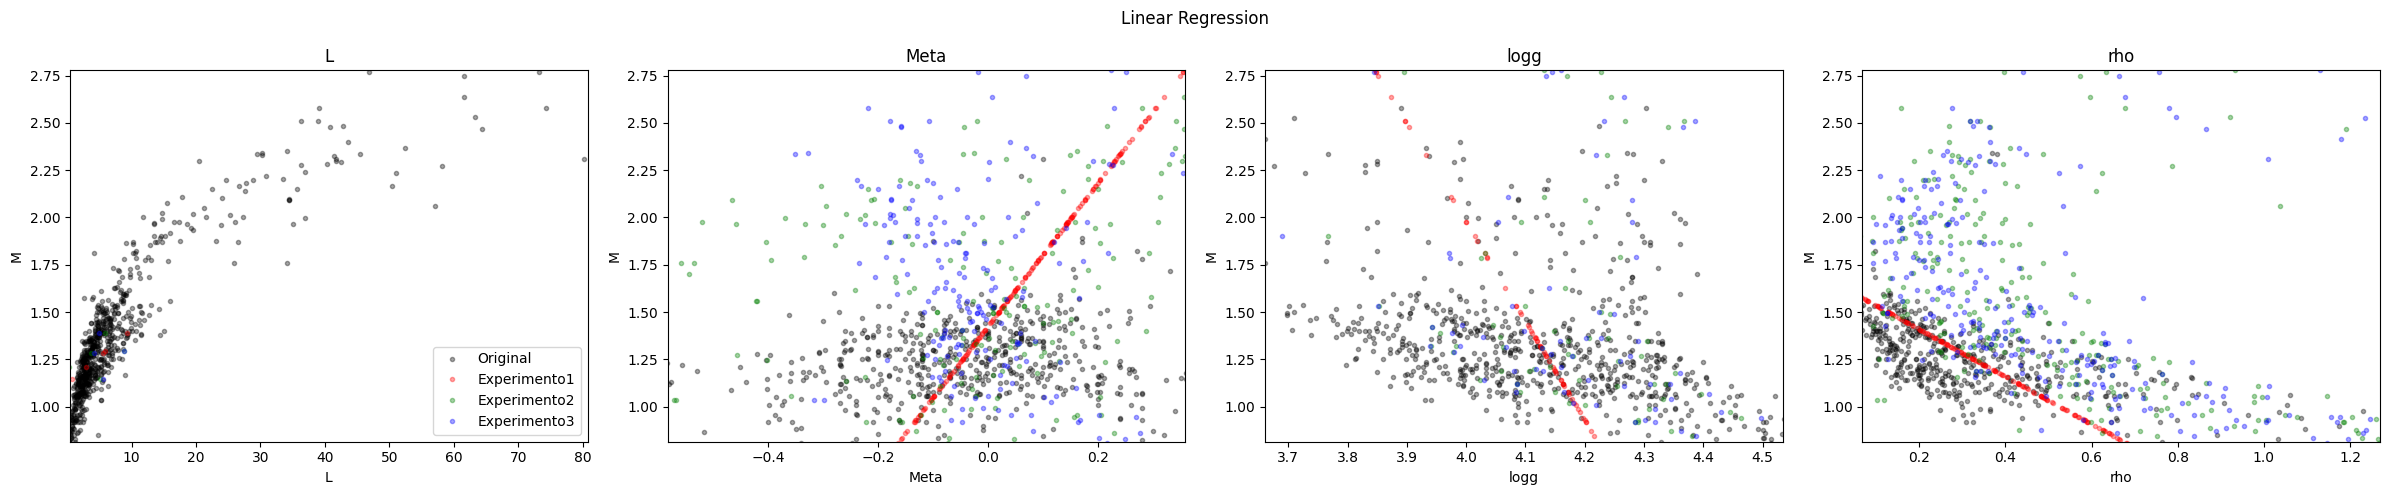

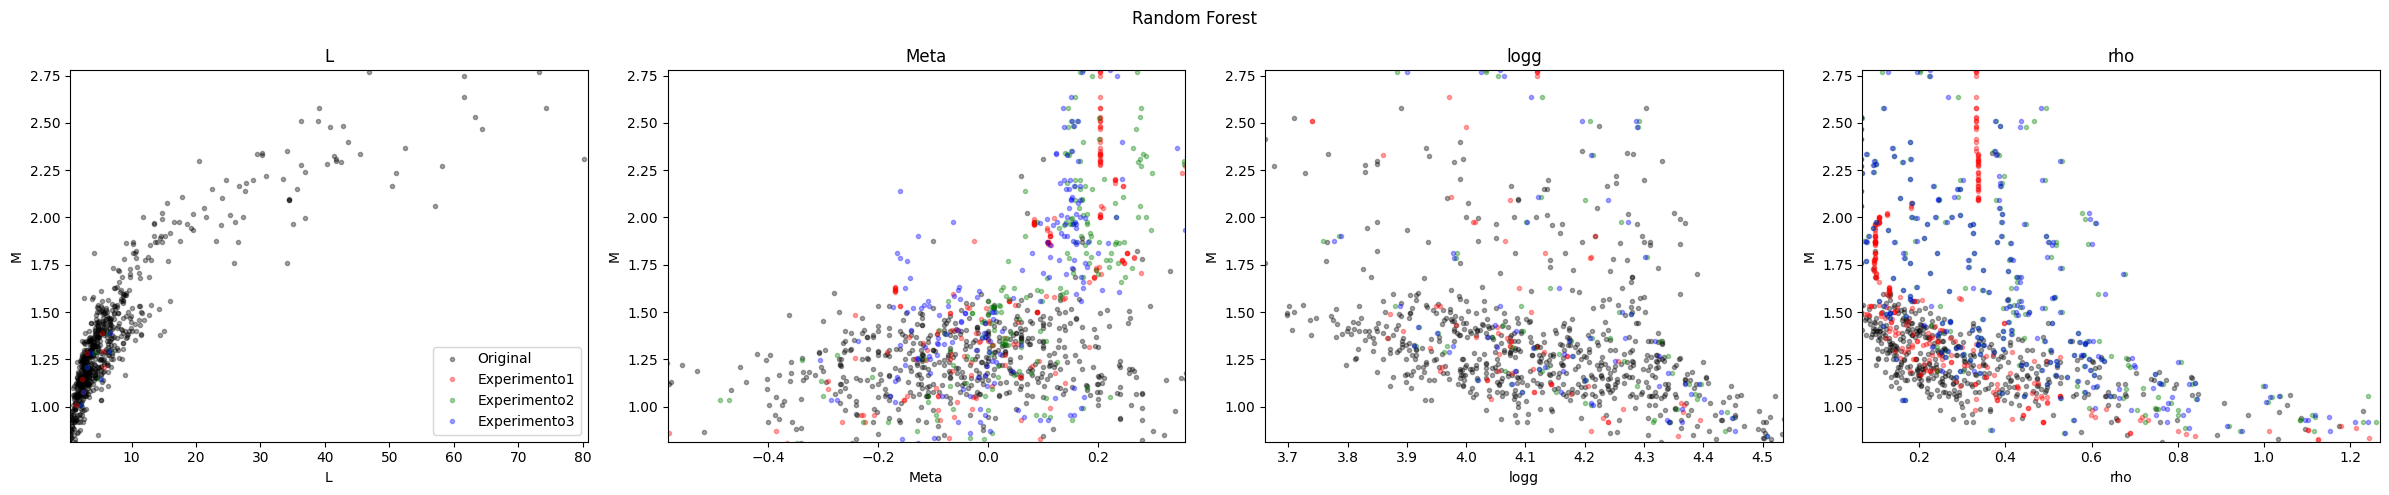

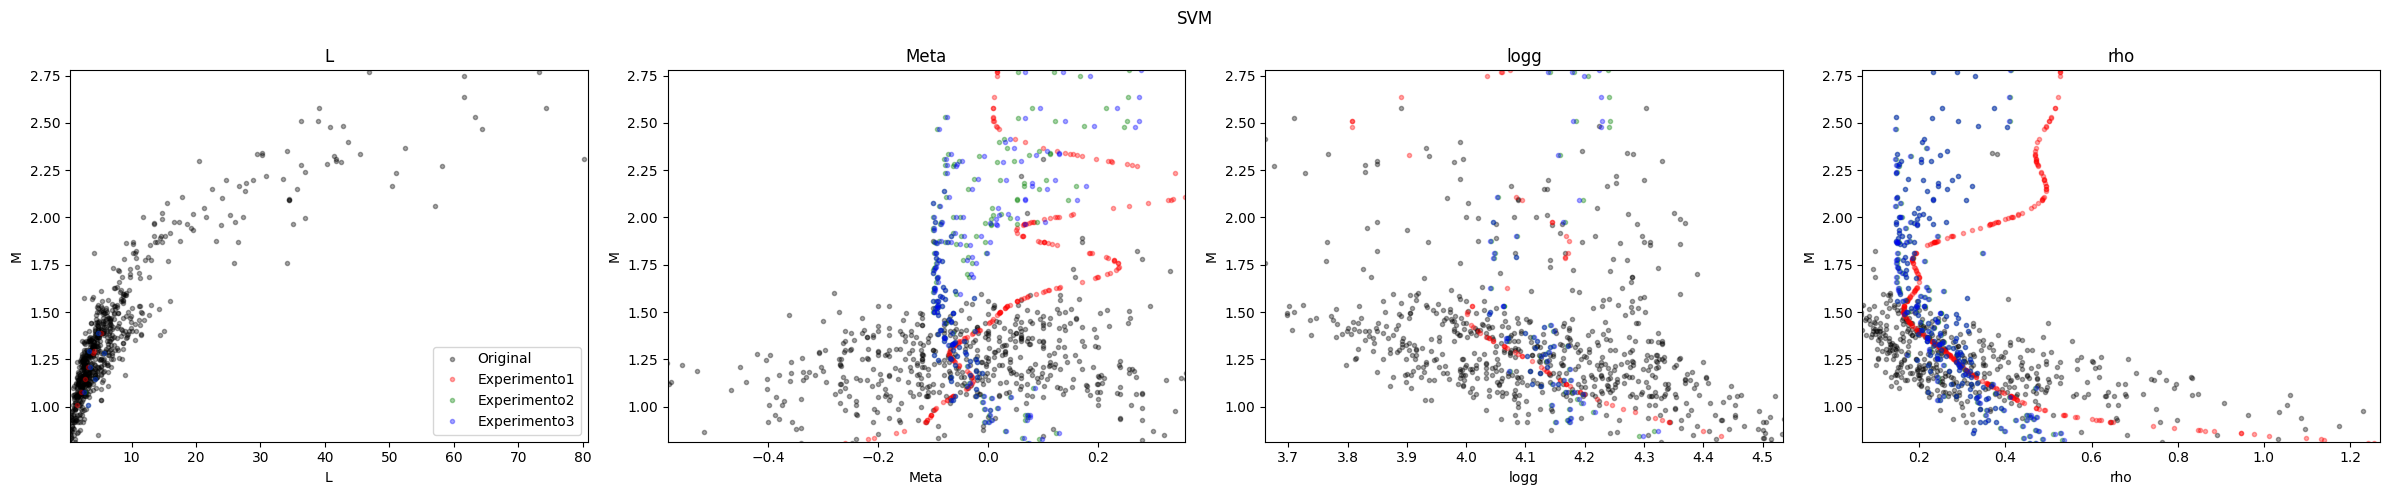

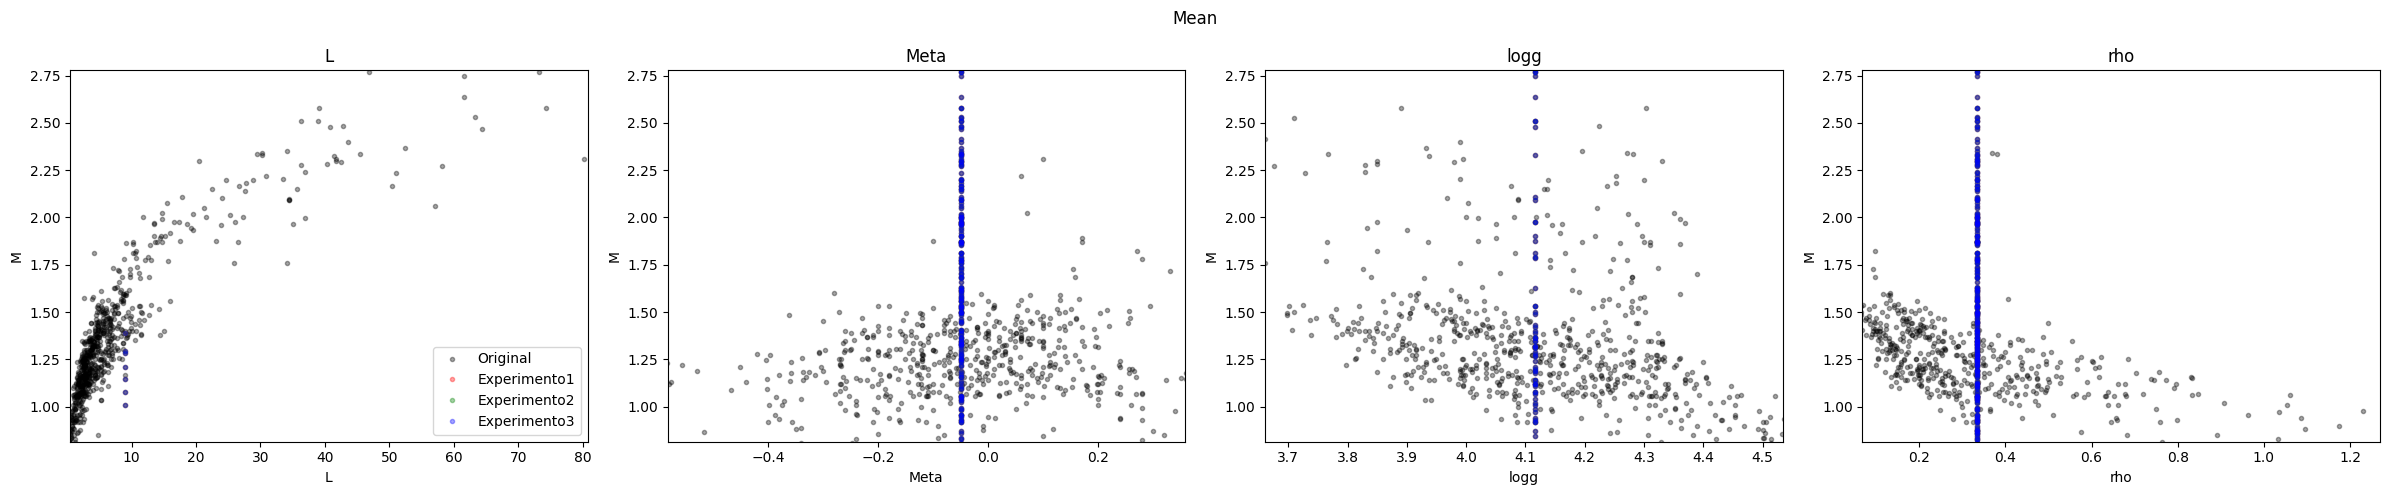

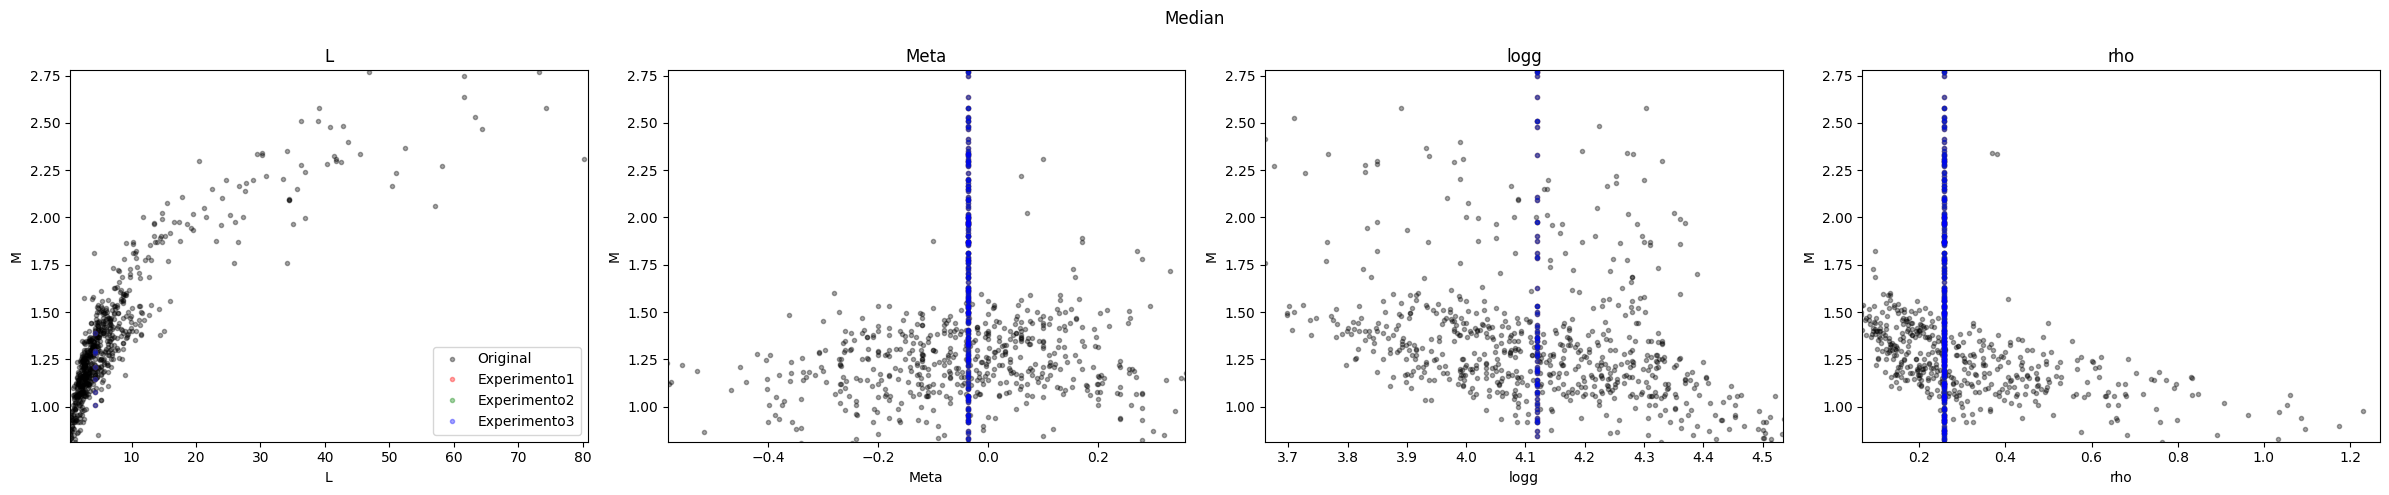

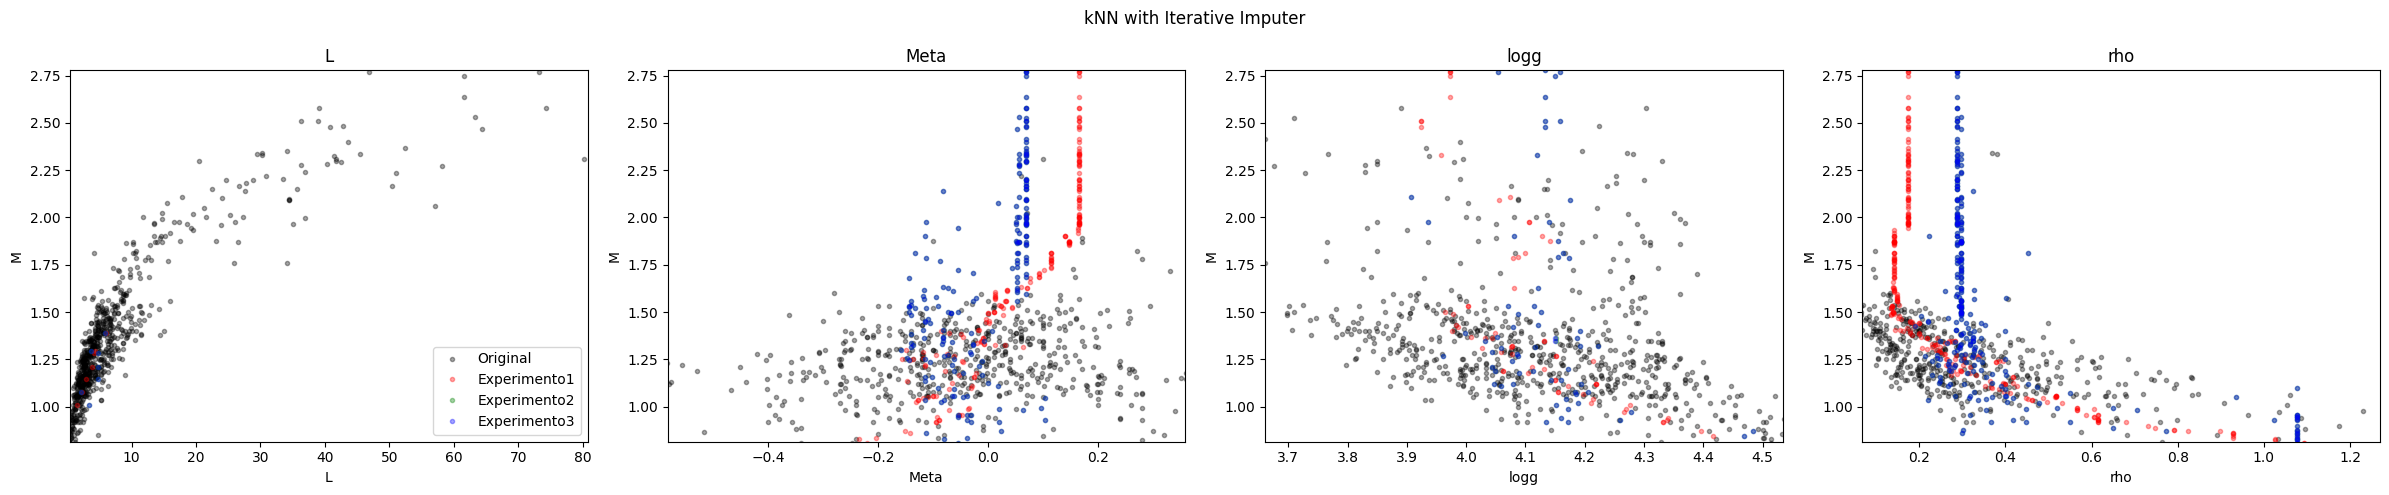

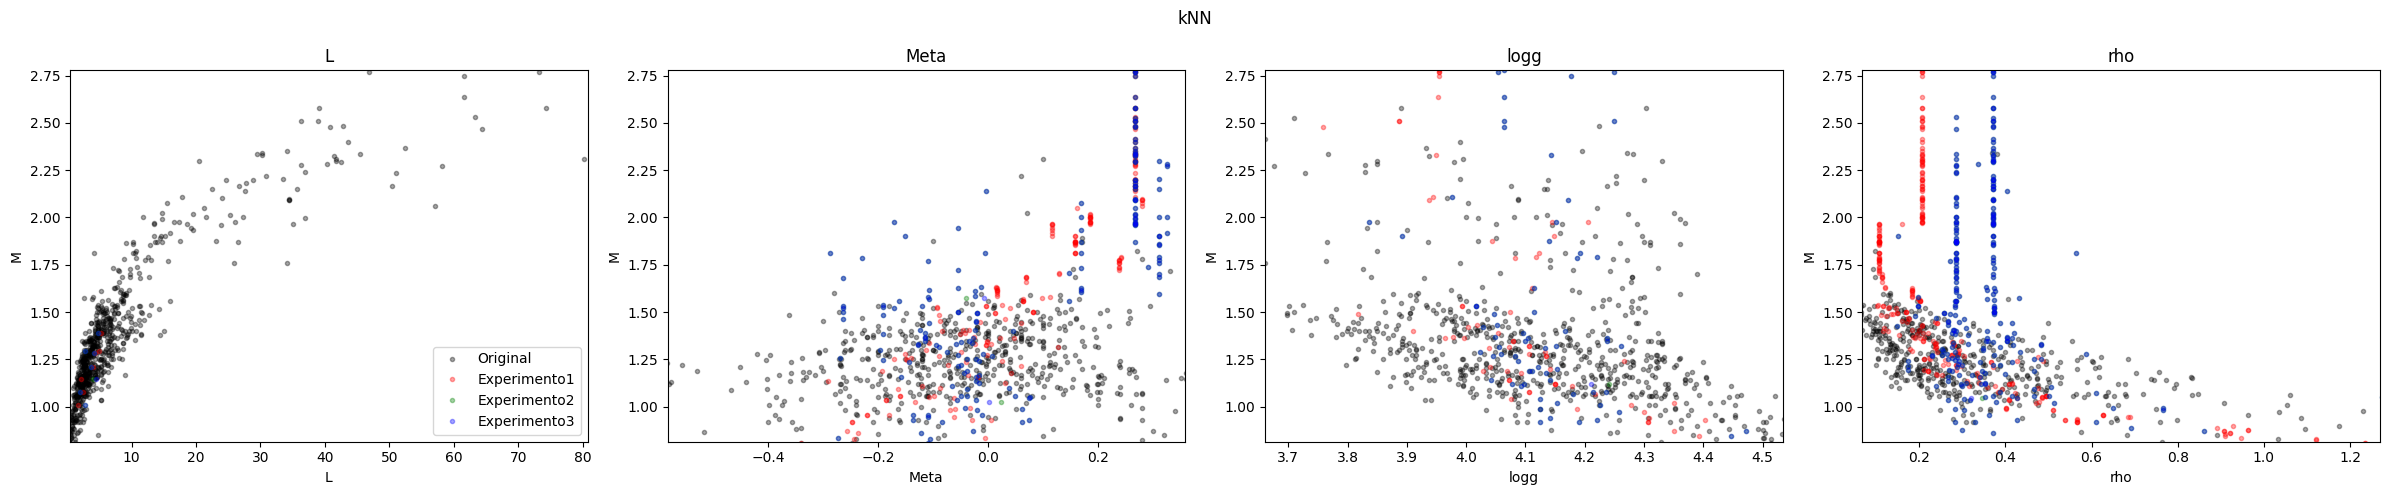

In [ ]:
graficoPorMetodo(listDataframes,stellar)

In [ ]:
def graficoCombinado(listDataframes, originalData):
    w_keys = list(listDataframes[0].keys())
    num_w = len(w_keys)
    colConNaN = [x for x in originalData if originalData[x].isna().sum() > 0]
    num_columns = len(colConNaN)

    plot_width_per_column = 6  # Modify this value to adjust the width of the individual plots

    # Create a Figure object for the combined graphs
    fig_combined, axes_combined = plt.subplots(nrows=num_w + 1, ncols=num_columns + 1, figsize=((plot_width_per_column + 1) * num_columns, 5 * (num_w + 1)))
    fig_combined.suptitle('')

    for i, w in enumerate(w_keys):
        for idx, y in enumerate(colConNaN):
            for a, z in enumerate(listDataframes, start=1):
                imputedData = z[w]
                imputedData = pd.DataFrame(imputedData)

                newData = imputedData[y] - originalData[y].fillna(float(0))
                newData = newData.replace(float(0), np.nan)

                color_map = {1: 'red', 2: 'green', 3: 'blue'}
                experiment_label = f'Experimento {a}'

                axes = axes_combined[i + 1, idx + 1]
                if a == 1:
                    axes.plot(originalData[y], originalData['M'], marker=".", color='black', linestyle='None', alpha=0.35, label='Original' if i == 0 and idx == 0 else "")
                axes.plot(newData, originalData['M'], marker=".", color=color_map[a], linestyle='None', alpha=0.35, label=experiment_label if i == 0 and idx == 0 else "")

                axes.set_title("")
                axes.set_ylabel('' if idx > 0 else 'M')
                axes.set_xlabel(y)
                x_lower, x_upper = np.percentile(originalData[y].dropna(), [1, 99])
                y_lower, y_upper = np.percentile(originalData['M'].dropna(), [1, 99])
                axes.set_xlim(x_lower, x_upper)
                axes.set_ylim(y_lower, y_upper)
                if i == 0 and idx == 0:
                    axes.legend()

        # Add w label to the left of the first element of each row
        axes_w = axes_combined[i + 1, 0]
        axes_w.axis('off')

        # Calculate the central vertical position
        y_lower, y_upper = axes_w.get_ylim()
        y_center = (y_upper + y_lower) / 2

        # Add the label 'w' centered vertically
        axes_w.text(0.5, y_center, w, ha='center', va='center', transform=axes_w.transAxes,weight='bold')

    # Add y label above each column
    for j, y in enumerate(colConNaN):
        axes_y = axes_combined[0, j + 1]
        axes_y.axis('off')

        # Calculate the central vertical position
        x_lower, x_upper = axes_y.get_xlim()
        x_center = (x_upper + x_lower) / 2
        
        # Add the label 'y' centered horizontally
        axes_y.text(x_center, 0.5, y, ha='center', va='center', transform=axes_y.transAxes,weight='bold')

    axes_y = axes_combined[0, 0]
    axes_y.axis('off')

    plt.tight_layout()

    # Save the combined figure
    filename_combined = "graficoCombinado.png"  # Replace with your preferred filename format
    fig_combined.savefig(filename_combined, dpi=300, bbox_inches='tight')

    plt.show()

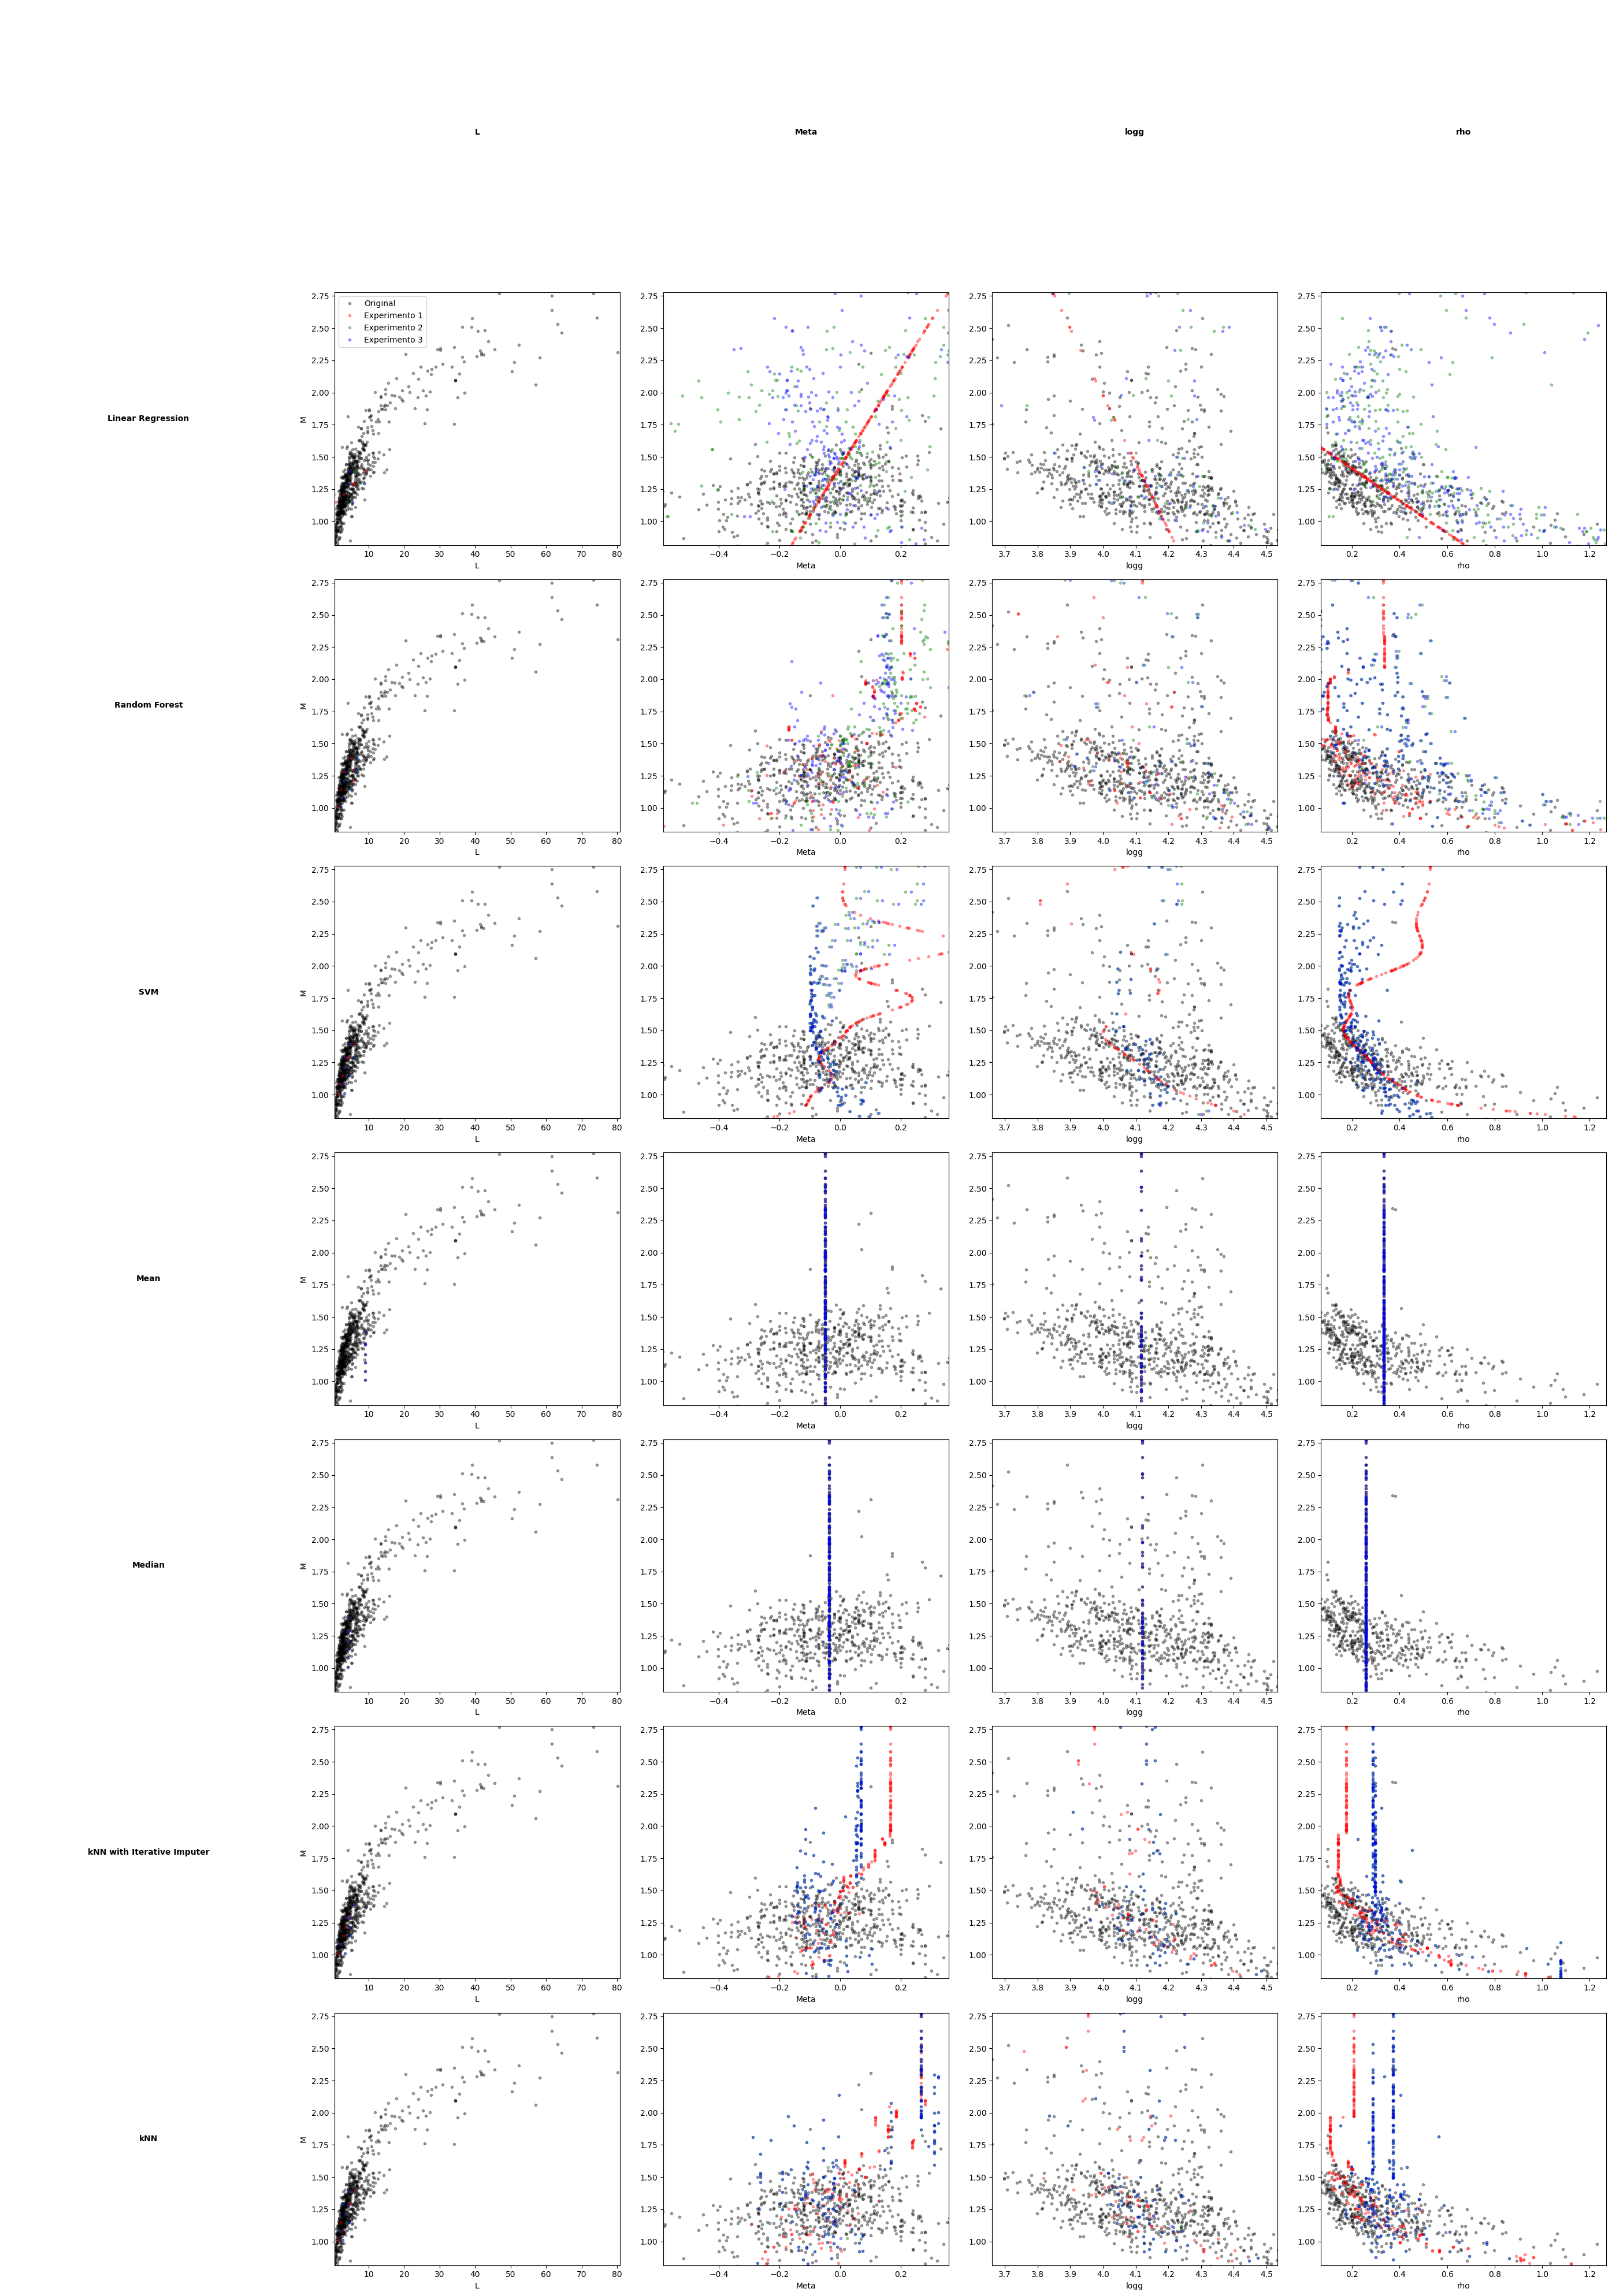

In [ ]:
graficoCombinado(listDataframes,stellarFiltered)

In [ ]:
!pip install -U google-colab
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00


In [ ]:
def graficos_individuales(listDataframes, originalData, save=True):
    w_keys = list(listDataframes[0].keys())
    colConNaN = [x for x in originalData if originalData[x].isna().sum() > 0]

    for w in w_keys:
        for y in colConNaN:
            for a, z in enumerate(listDataframes, start=1):
                fig, ax = plt.subplots(figsize=(6, 5))

                imputedData = z[w]
                imputedData = pd.DataFrame(imputedData)

                newData = imputedData[y] - originalData[y].fillna(float(0))
                newData = newData.replace(float(0), np.nan)

                color_map = {1: 'red', 2: 'green', 3: 'blue'}
                experiment_label = f'Experimento {a}'

                ax.plot(originalData[y], originalData['M'], marker=".", color='black', linestyle='None', alpha=0.35, label='Original')
                ax.plot(newData, originalData['M'], marker=".", color=color_map[a], linestyle='None', alpha=0.35, label=experiment_label)

                ax.set_title(f"{w}")
                ax.set_xlabel(y)
                ax.set_ylabel('M')
                x_lower, x_upper = np.percentile(originalData[y].dropna(), [1, 99])
                y_lower, y_upper = np.percentile(originalData['M'].dropna(), [1, 99])
                ax.set_xlim(x_lower, x_upper)
                ax.set_ylim(y_lower, y_upper)
                ax.legend()

                if save:
                    filename = f"{w}_{y}_Experimento{a}.png"
                    fig.savefig(filename, dpi=300, bbox_inches='tight')
                    files.download(filename)

                plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

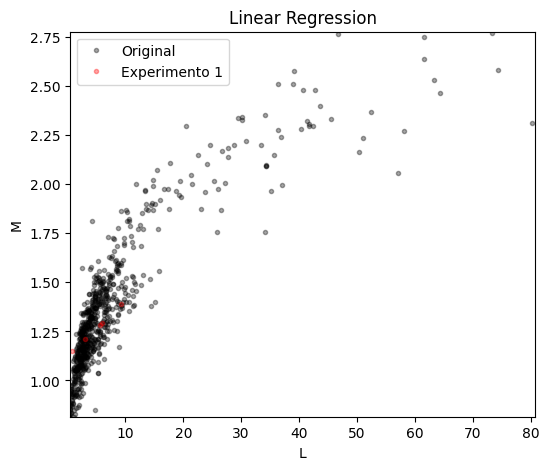

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

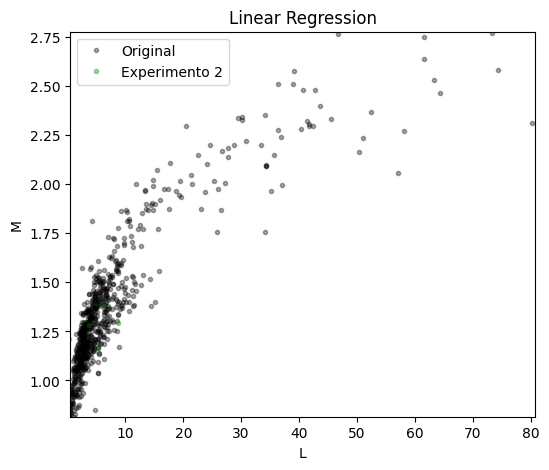

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

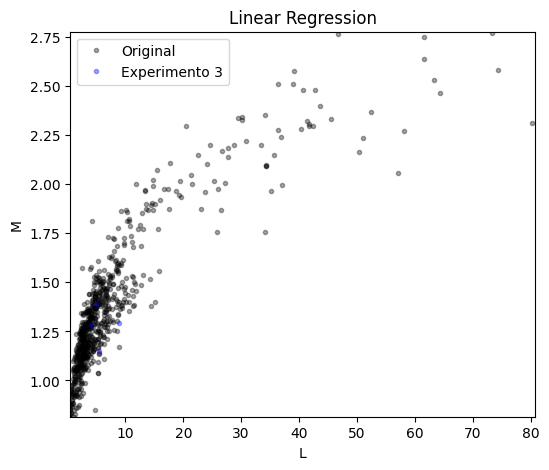

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

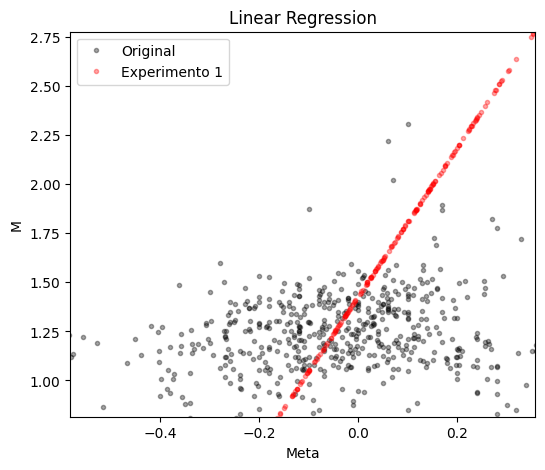

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

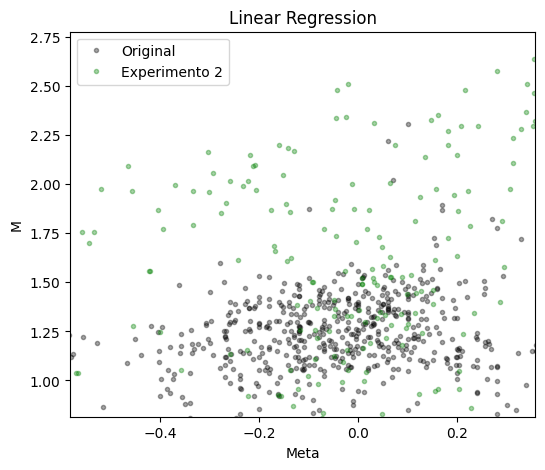

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

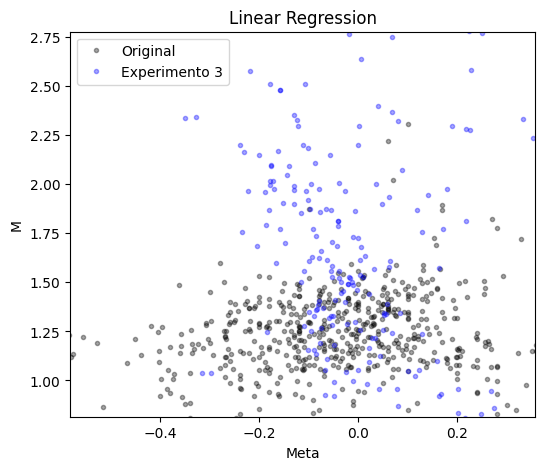

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

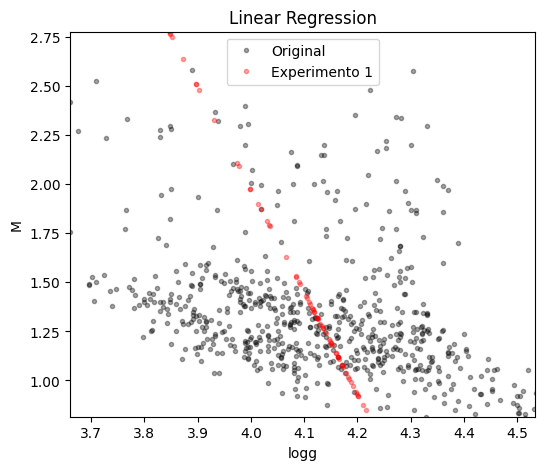

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

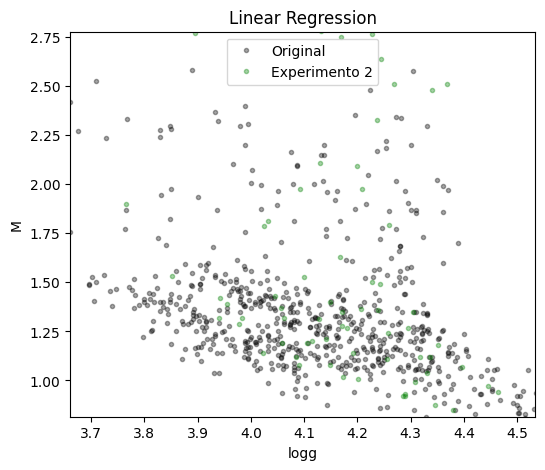

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

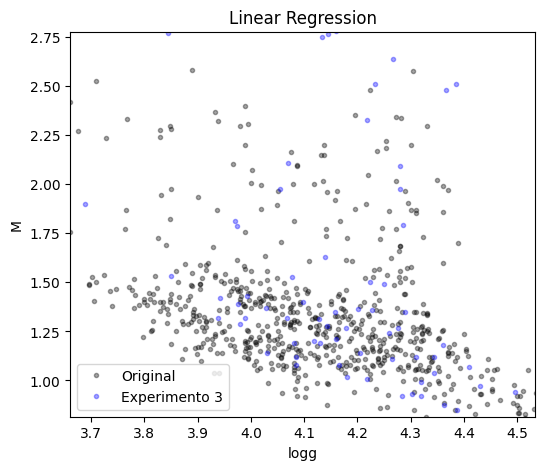

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

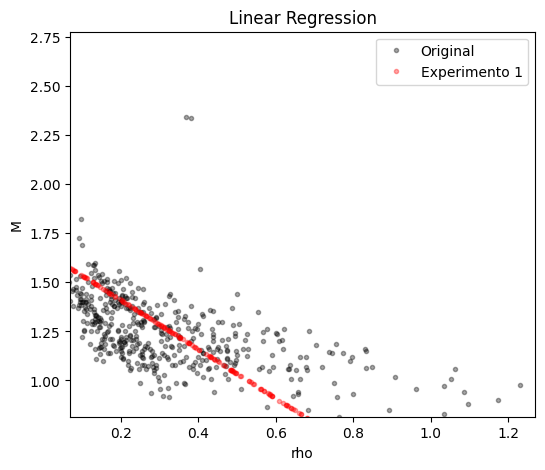

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

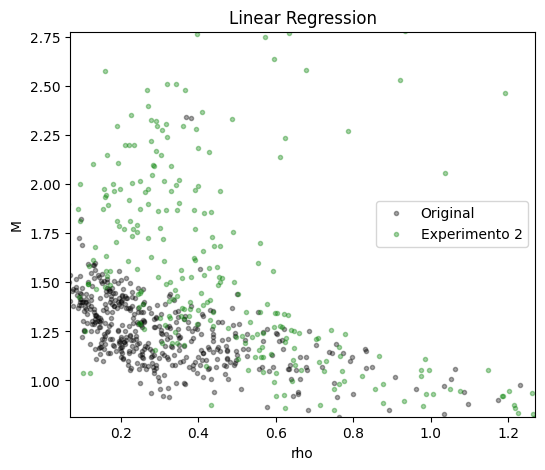

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

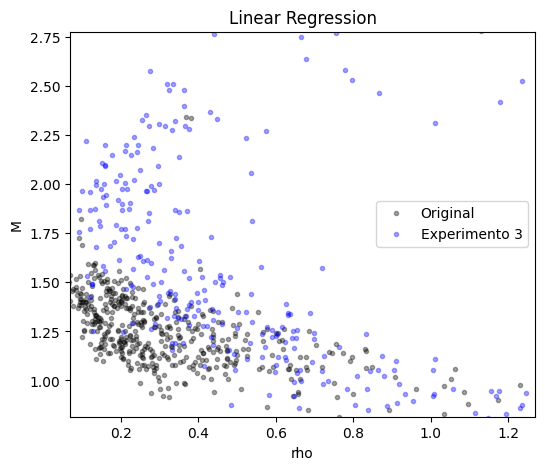

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

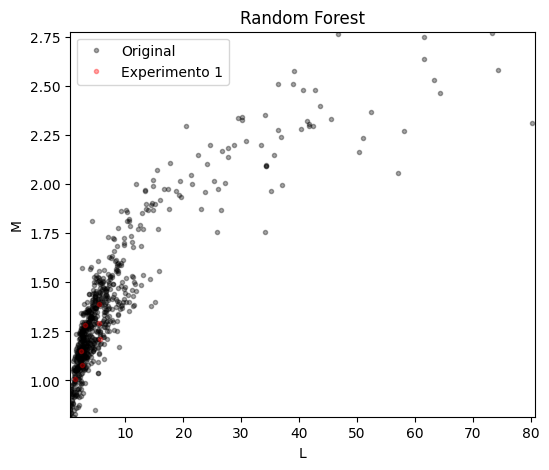

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

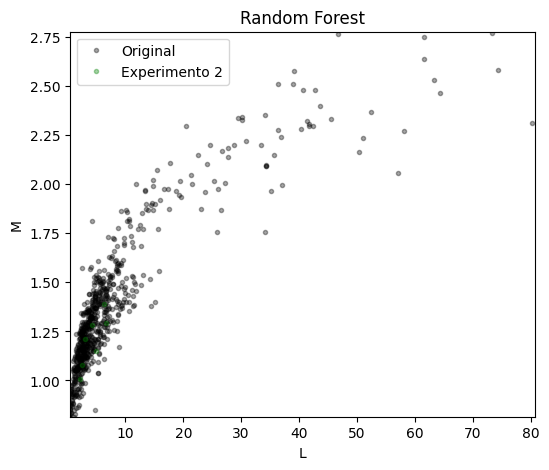

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

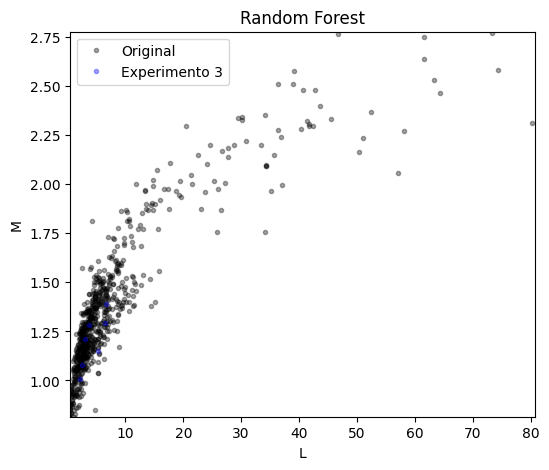

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

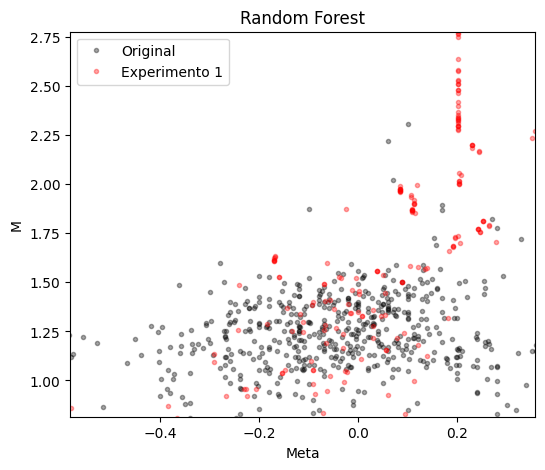

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

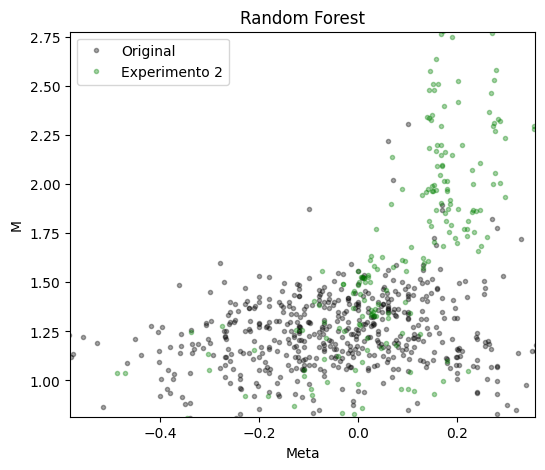

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

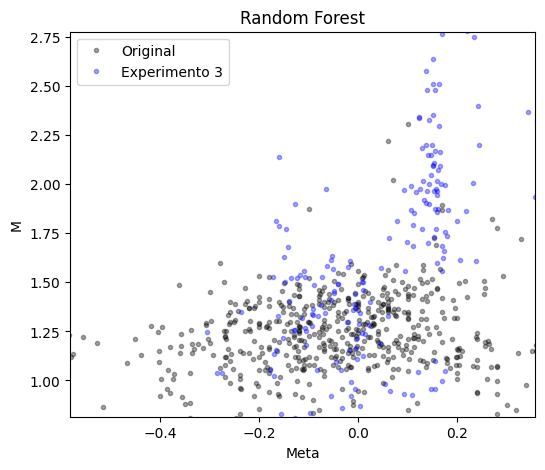

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

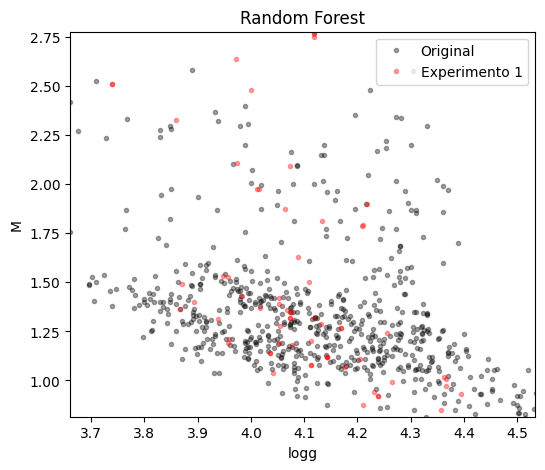

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

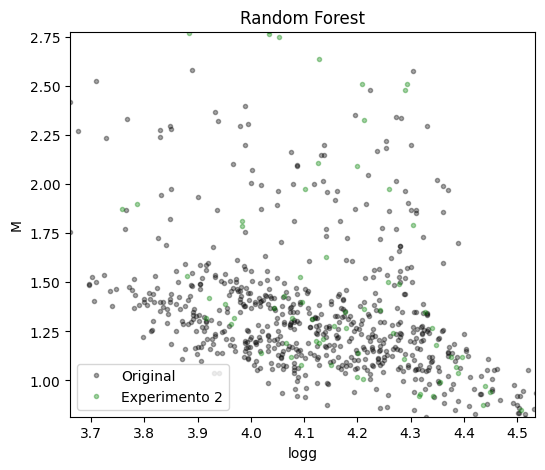

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

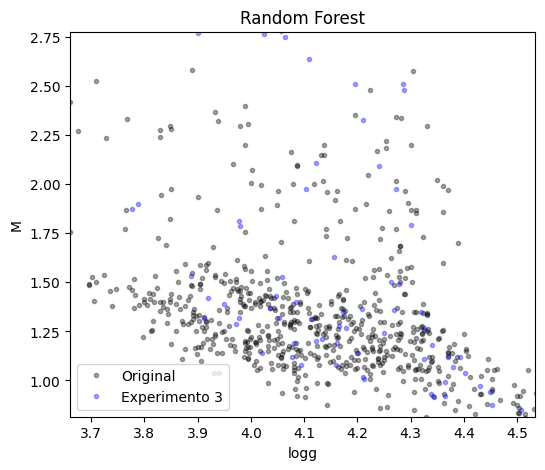

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

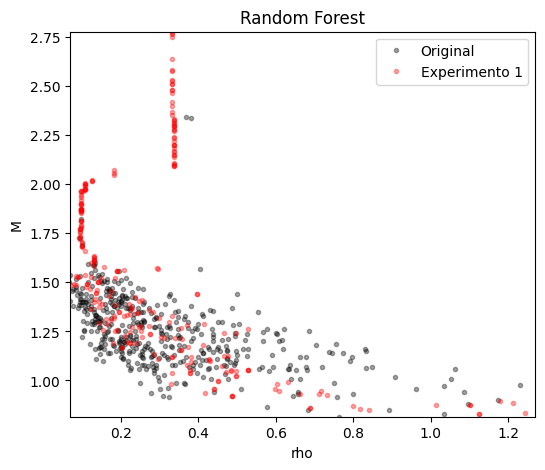

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

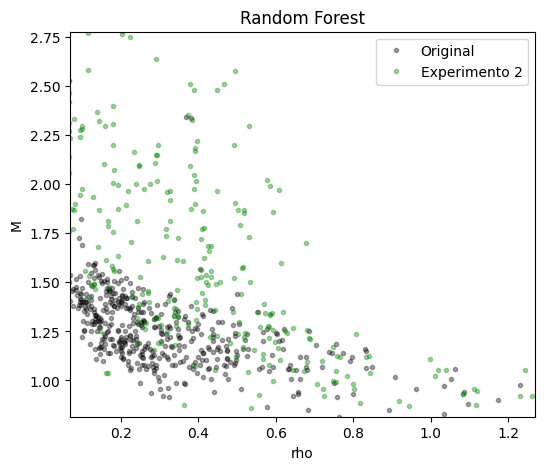

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

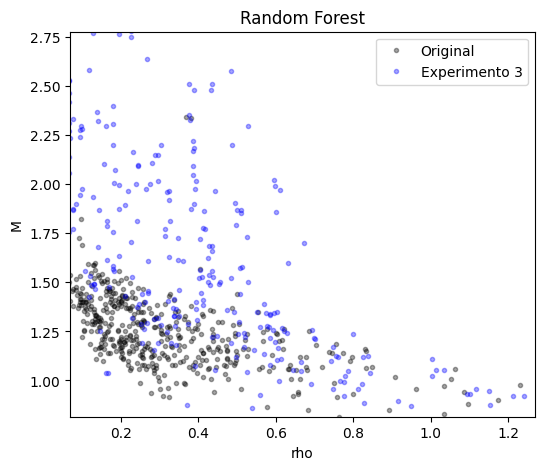

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

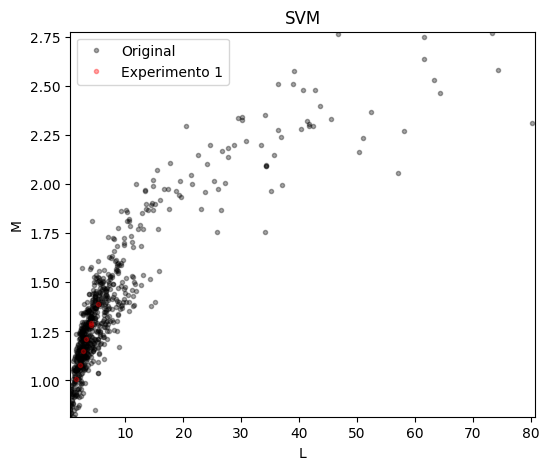

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

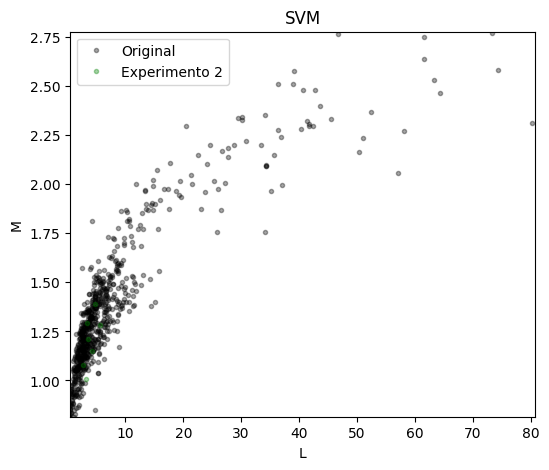

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

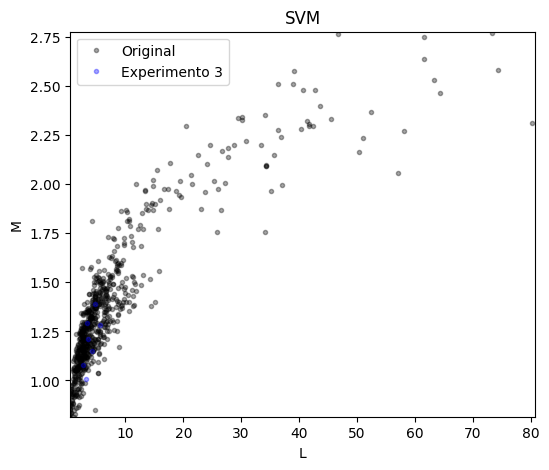

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

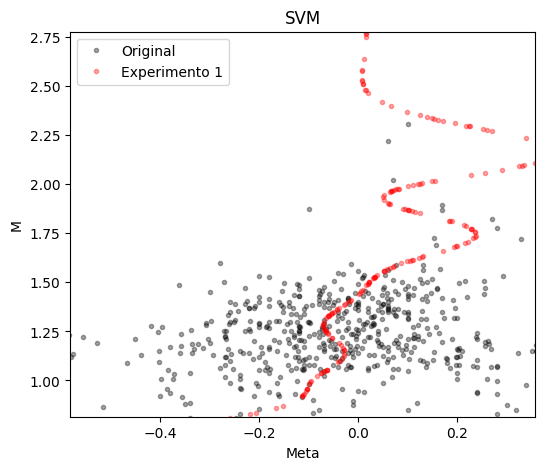

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

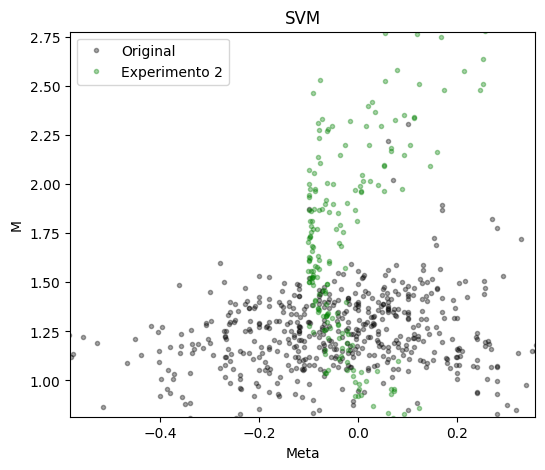

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

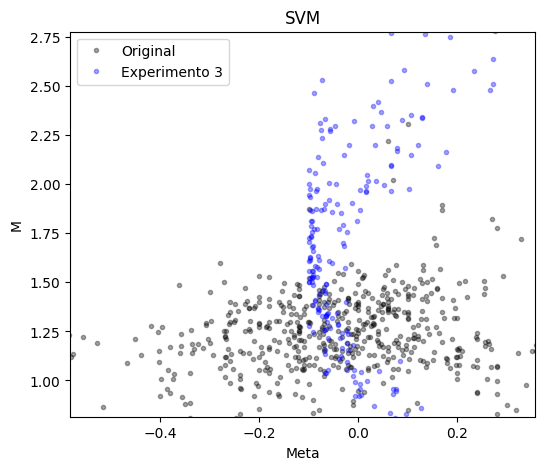

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

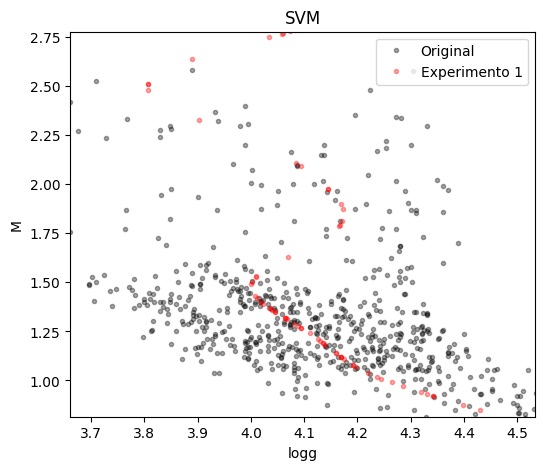

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

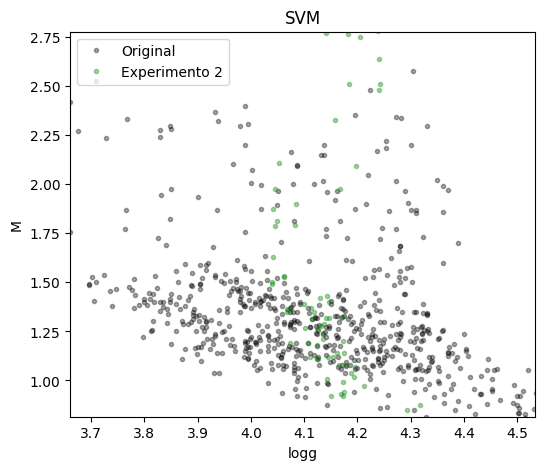

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

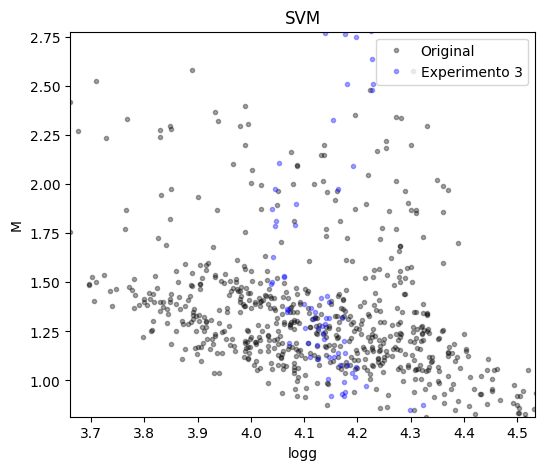

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

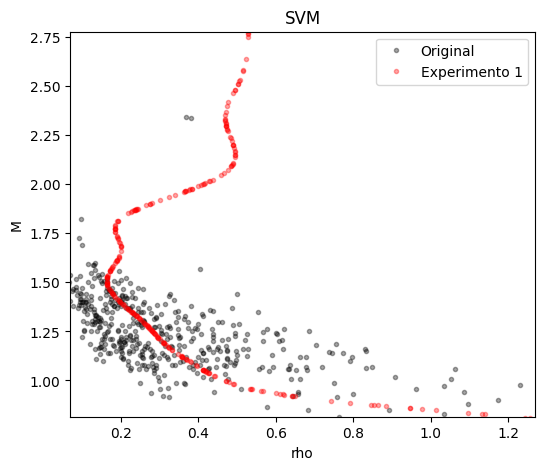

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

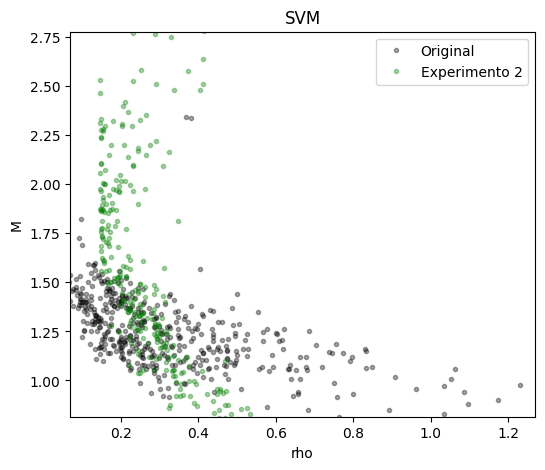

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

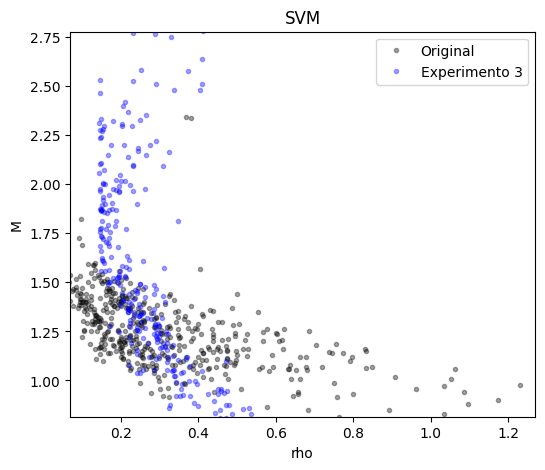

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

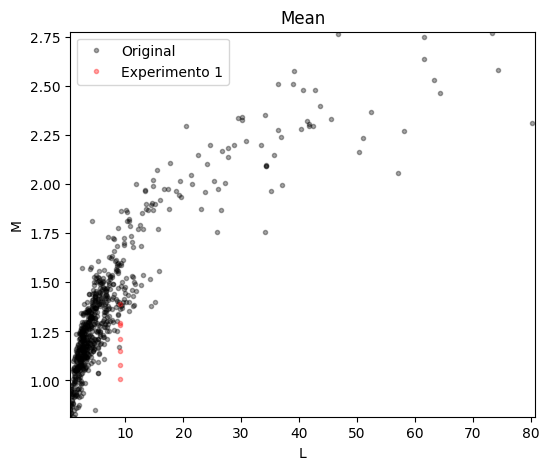

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

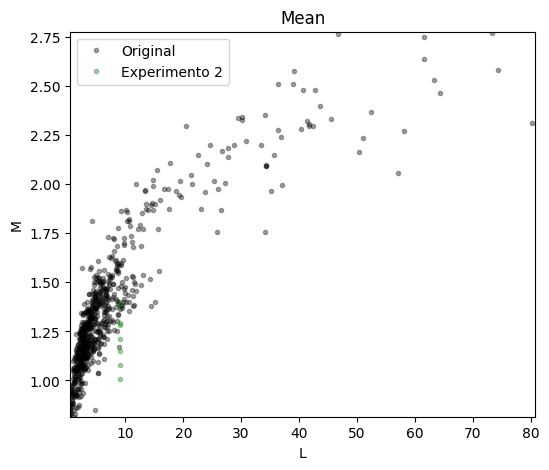

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

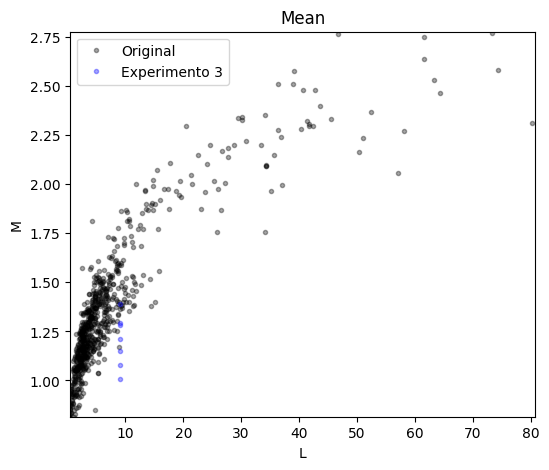

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

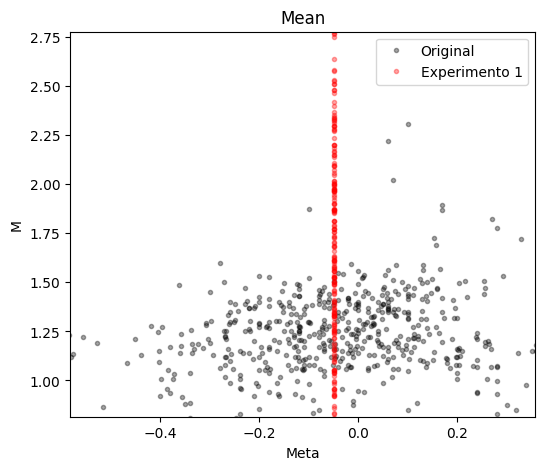

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

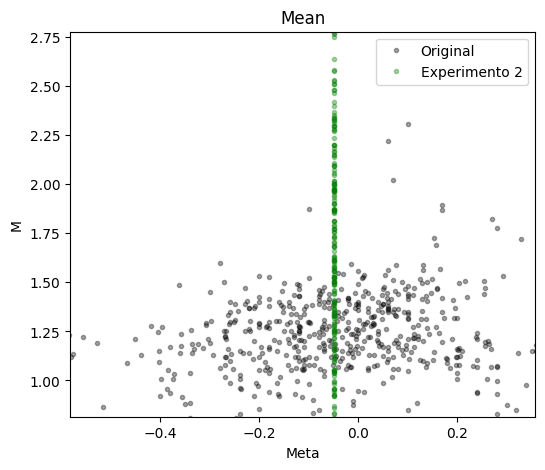

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

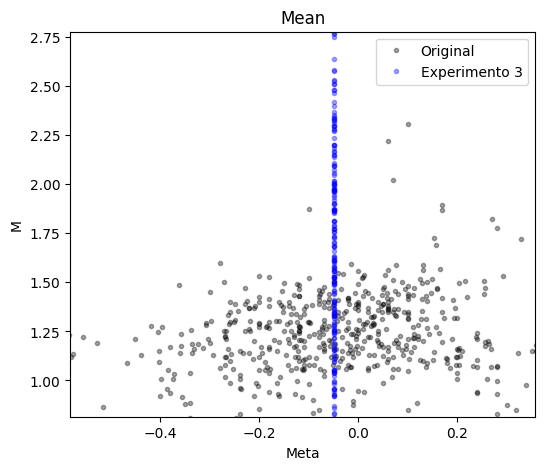

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

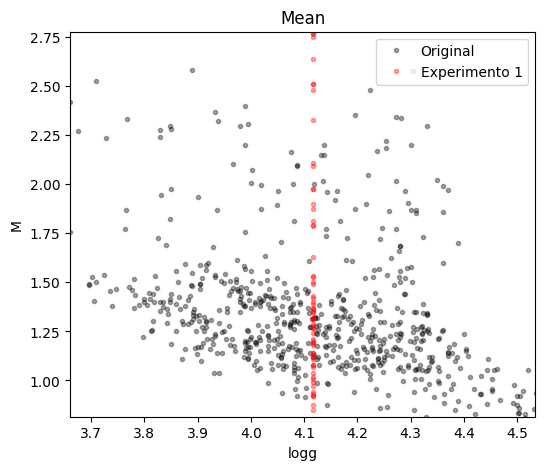

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

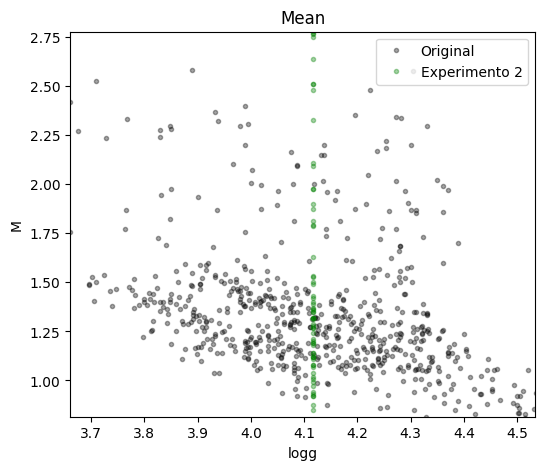

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

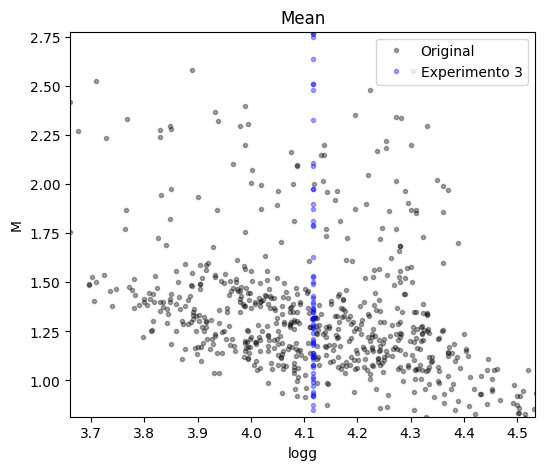

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

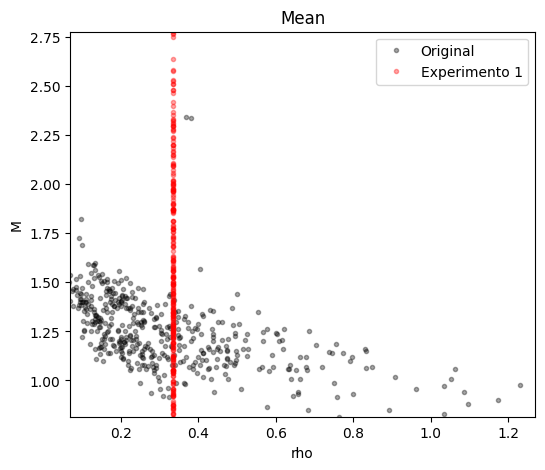

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

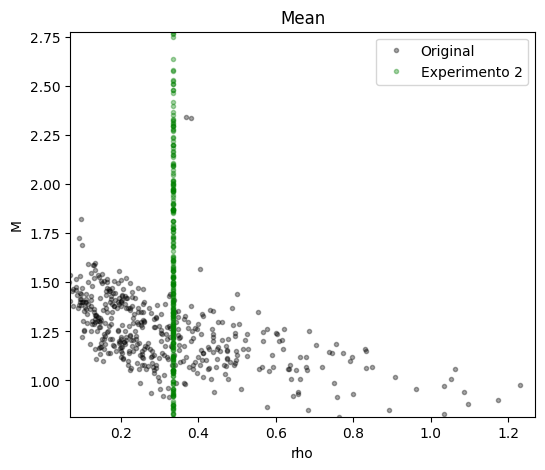

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

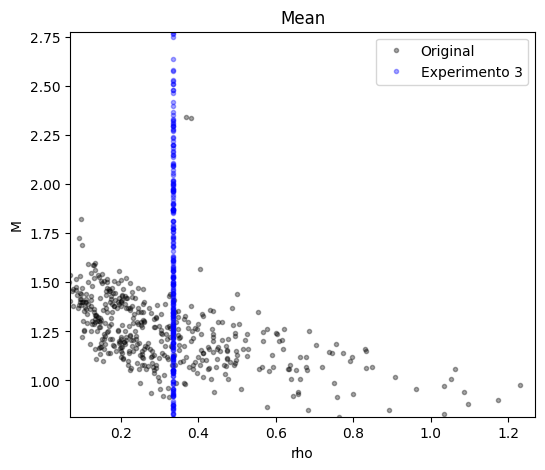

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

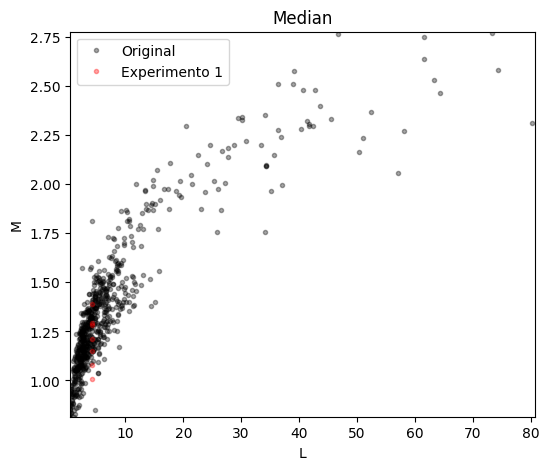

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

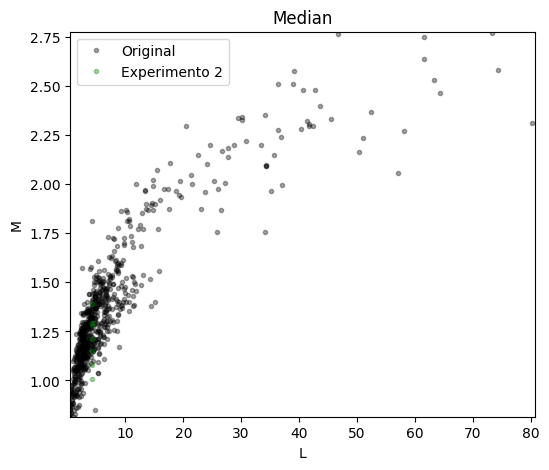

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

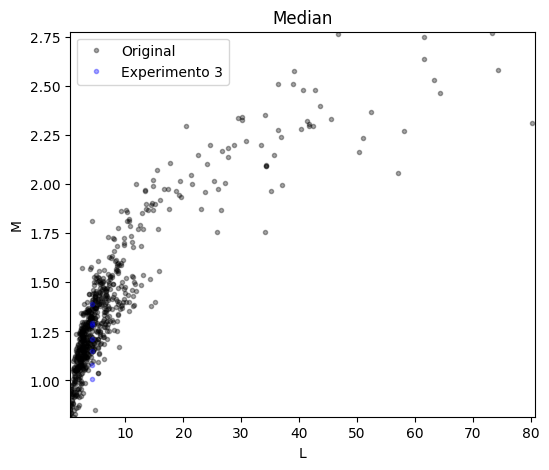

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

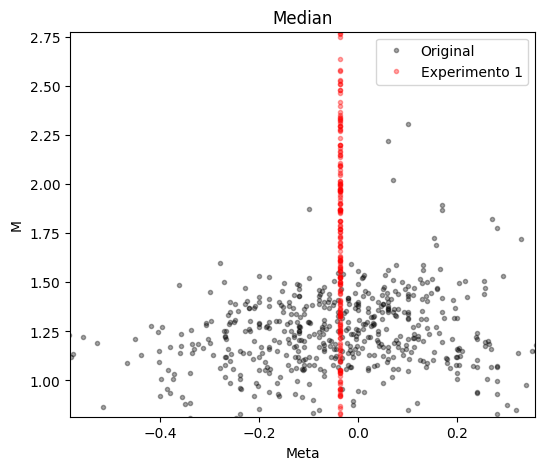

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

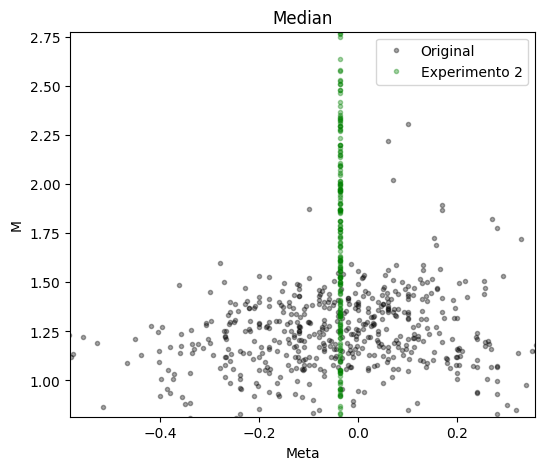

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

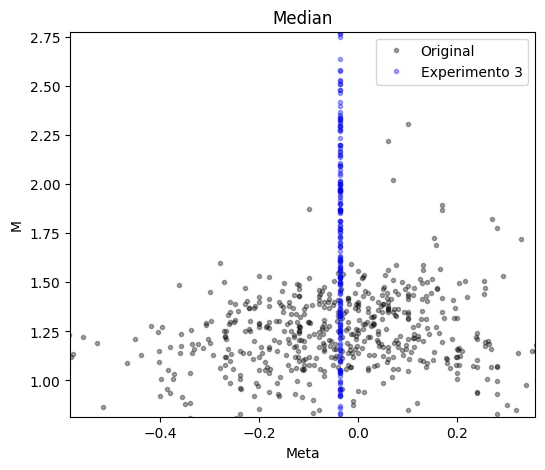

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

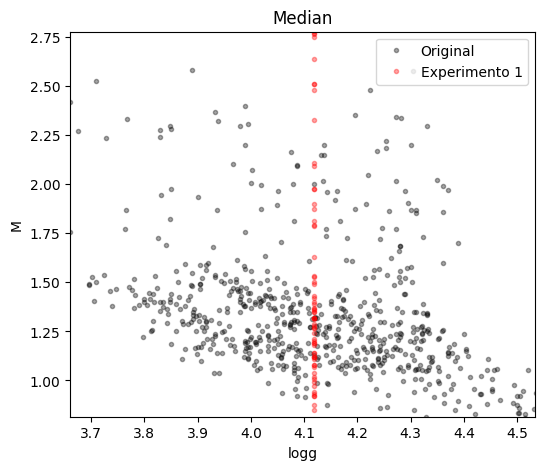

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

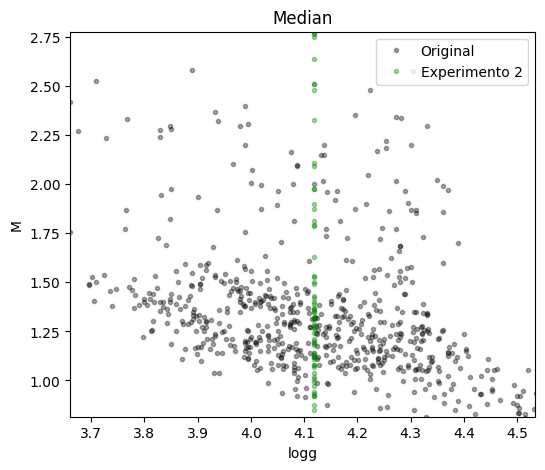

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

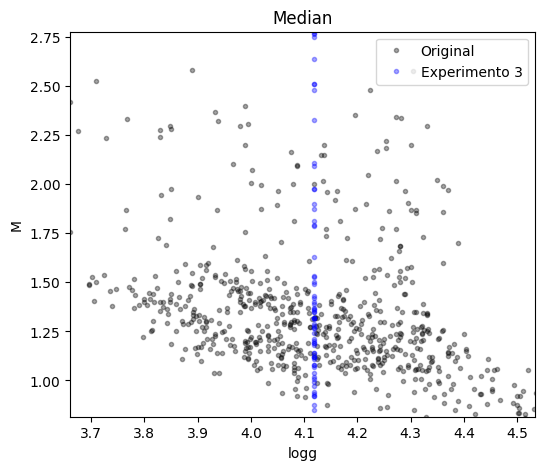

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

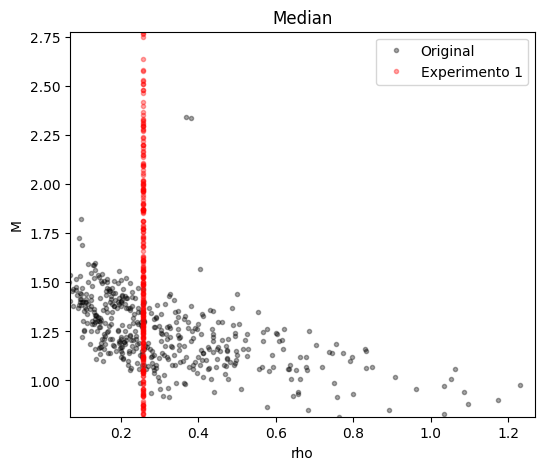

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

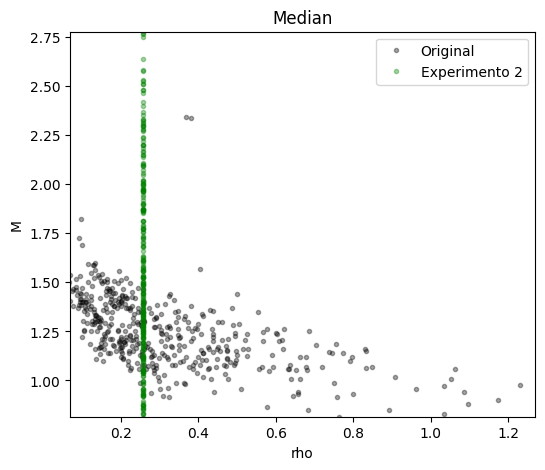

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

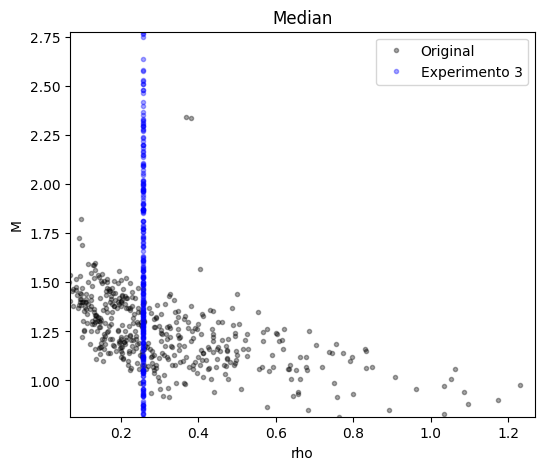

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

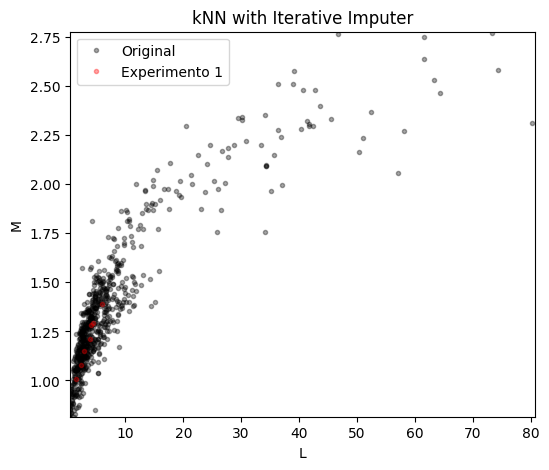

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

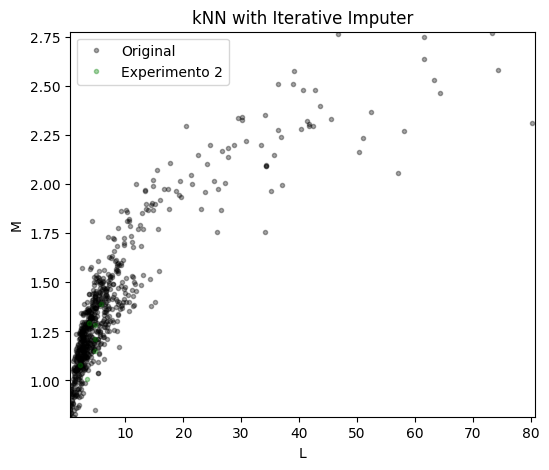

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

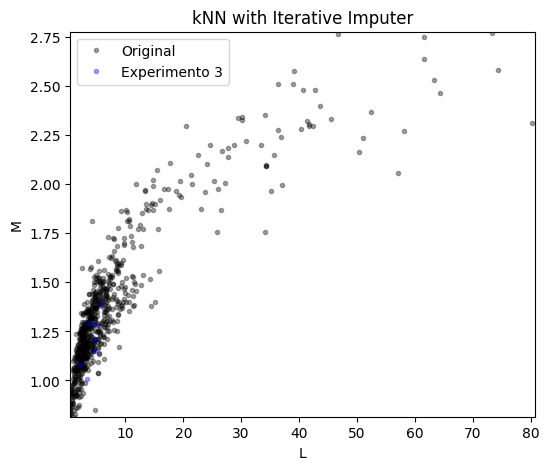

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

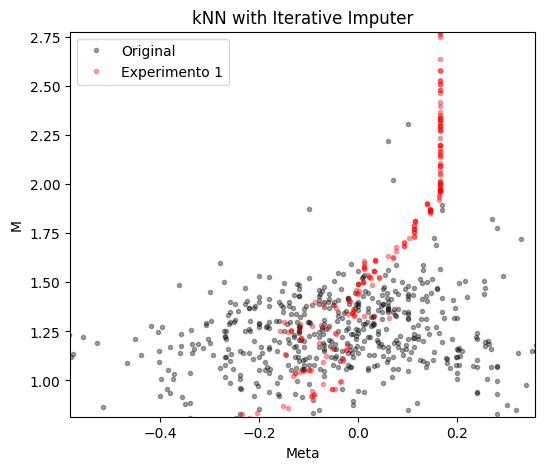

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

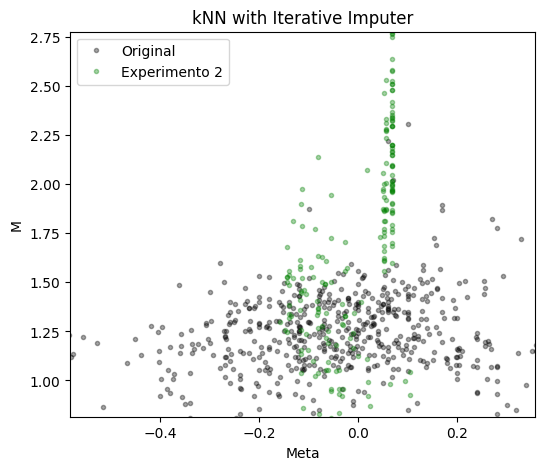

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

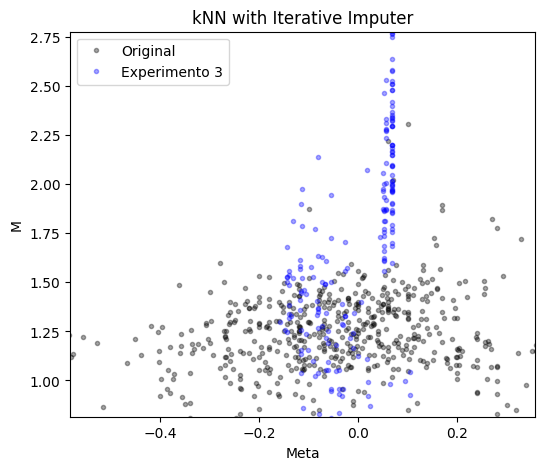

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

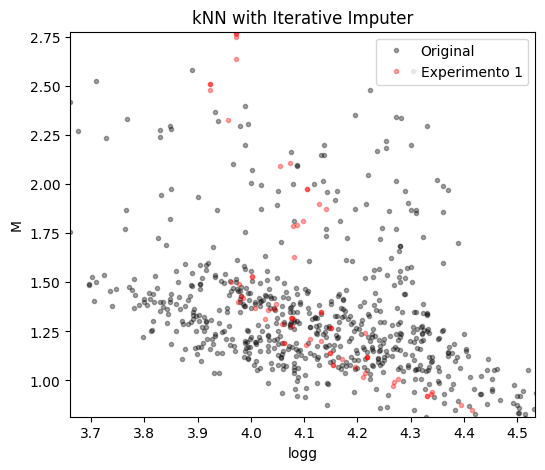

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

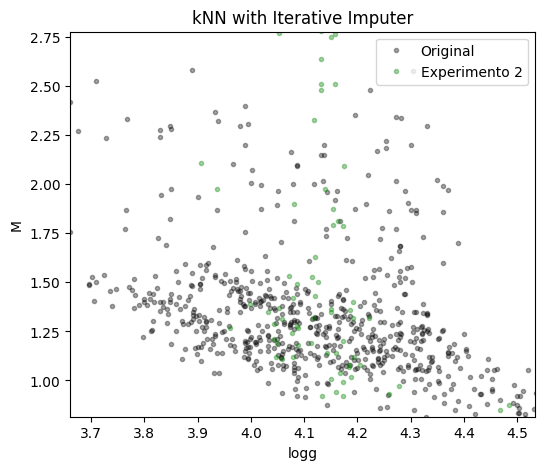

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

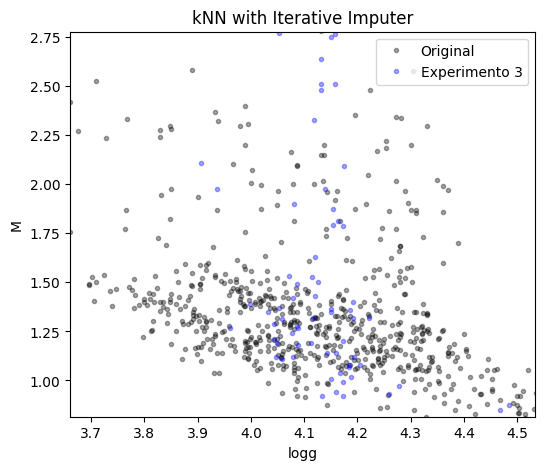

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

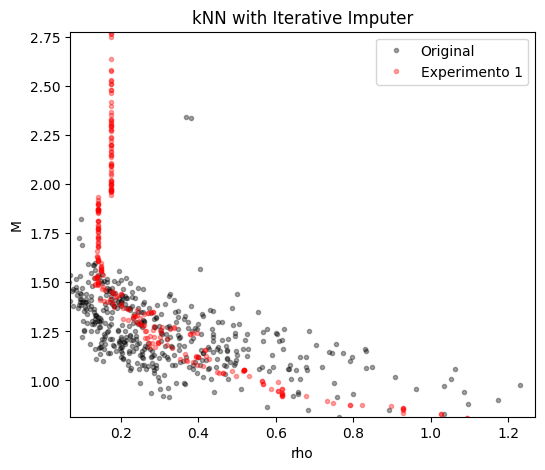

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

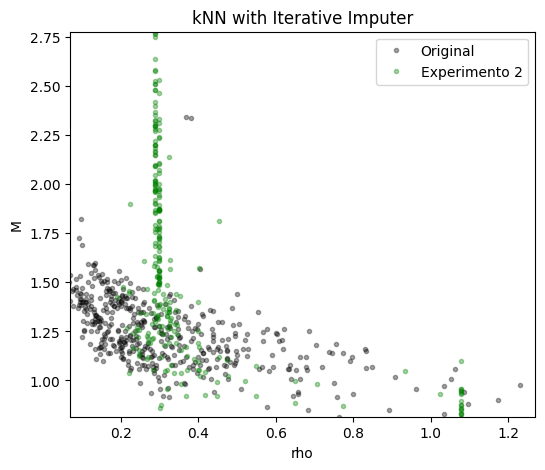

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

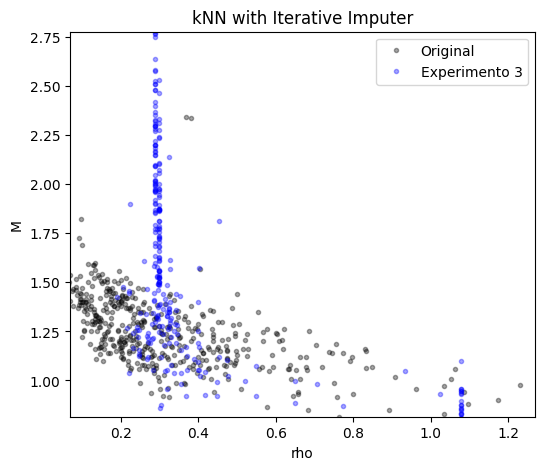

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

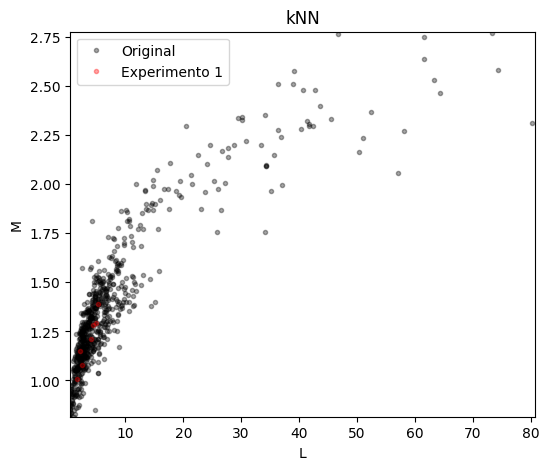

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

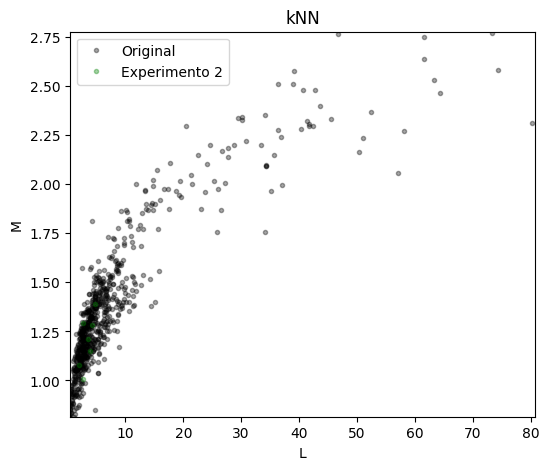

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

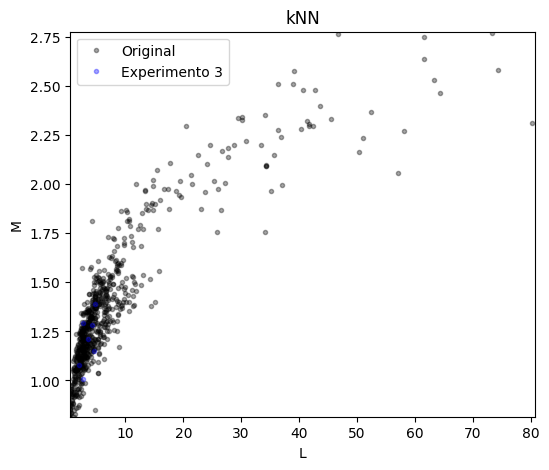

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

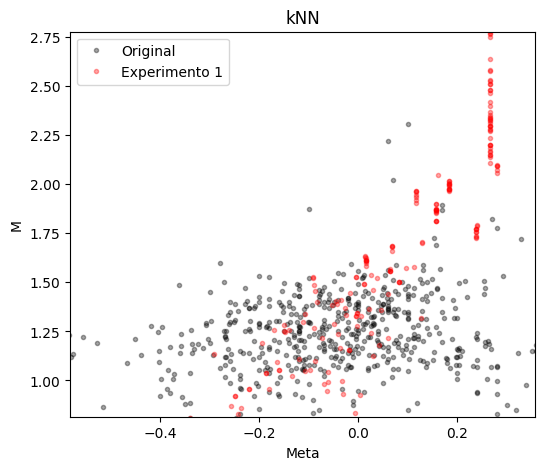

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

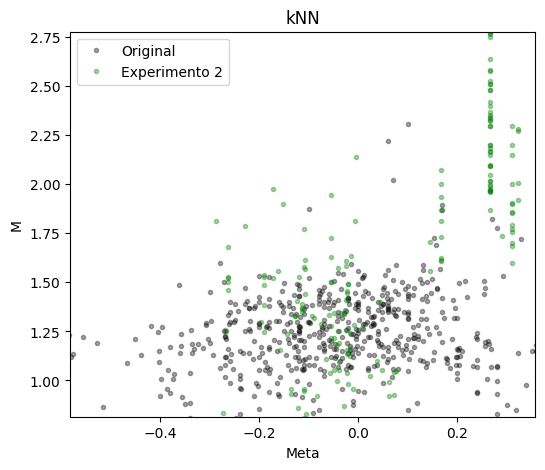

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

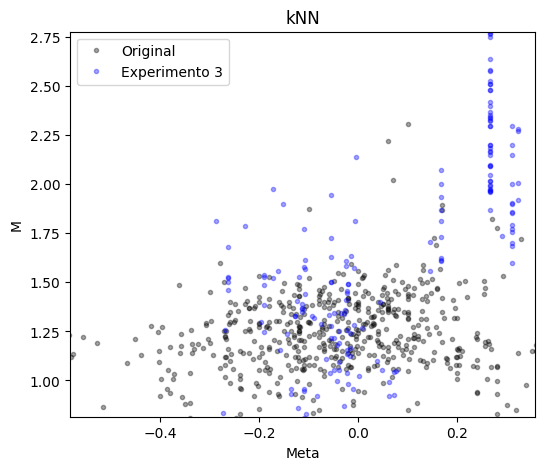

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

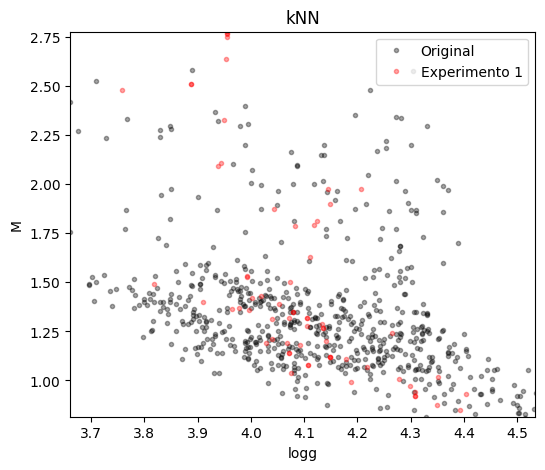

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

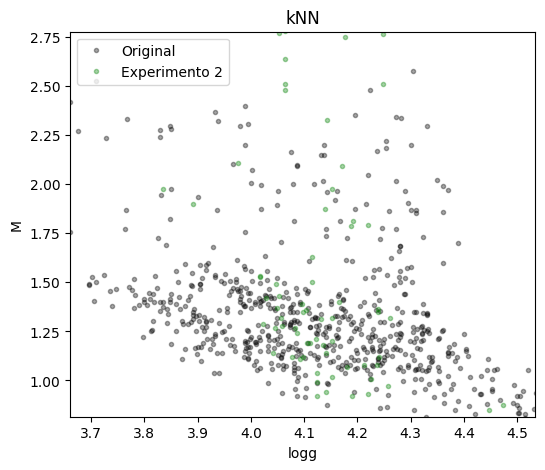

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

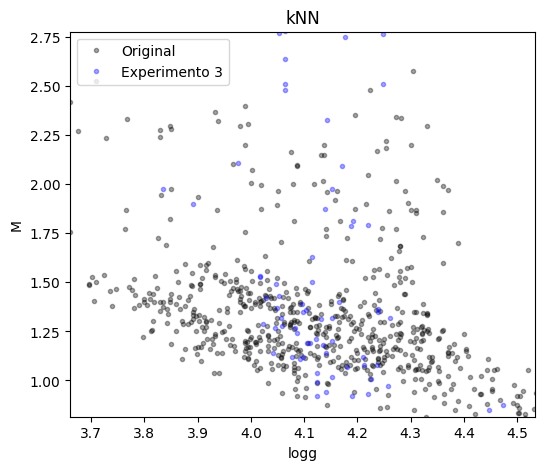

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

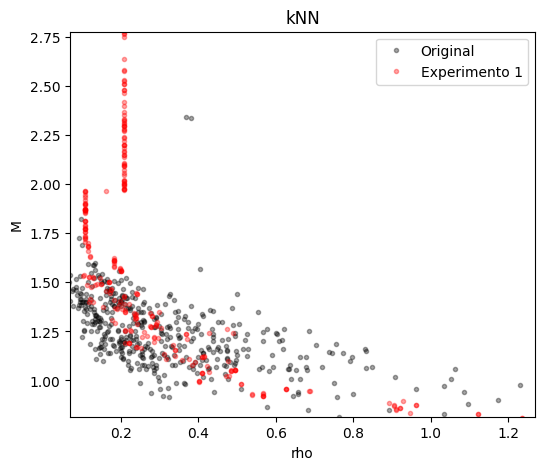

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

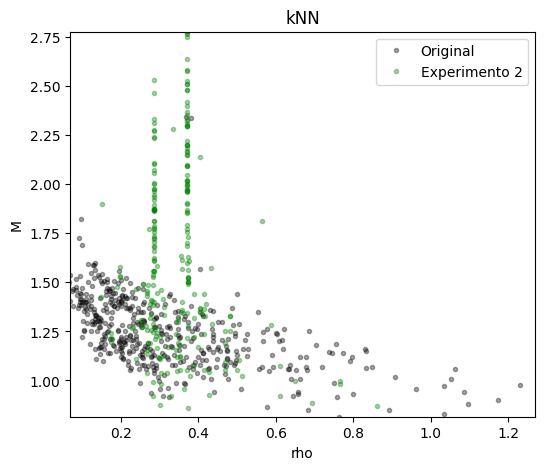

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

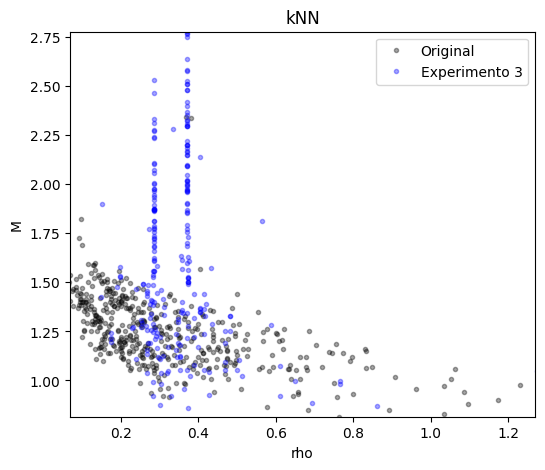

In [ ]:
graficos_individuales(listDataframes, stellarFiltered)

##Otra información

Pendientes por orden de prioridad:

* Comentar el código.

**Algunas fuentes:**
* [A Complete Guide to Dealing with Missing values in Python](https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/)
* [Missing Data Imputation for Galaxy Redshift Estimation](https://arxiv.org/pdf/2111.13806.pdf#Hfootnote.5)
* https://github.com/kluken/Redshift_Imputation
*  [Effective Handling of Missing Values in Datasets for Classification Using Machine Learning Methods](https://www.mdpi.com/2078-2489/14/2/92)
* [ Impute missing values using KNNImputer or IterativeImputer ](https://www.youtube.com/watch?v=m_qKhnaYZlc)
* [ Multivariate Imputation By Chained Equations (MICE) algorithm for missing values | Machine Learning ](https://www.youtube.com/watch?v=WPiYOS3qK70)

**Visualización de valores faltantes**:
* [ Missingno Python Library | Visualising Missing Values in Data Prior to Machine Learning ](https://www.youtube.com/watch?v=Wdvwer7h-8w)